<a id='nachalo'></a>

### Проект № 3
# Исследование объявлений о продаже квартир

Исполнитель: Варивода С. П.

## Цель проекта

Исследовать архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах и на его основе научиться определять рыночную стоимость объектов недвижимости.

## Шаг 1 из 5. Описание данных

В качестве исходных данных для анализа нам предоставлен файл CSV, содержащий 23699 записей, содержащих следующие столбцы:
- <code>airports_nearest</code> — расстояние до ближайшего аэропорта в метрах (м)
- <code>balcony</code> — число балконов
- <code>ceiling_height</code> — высота потолков (м)
- <code>cityCenters_nearest</code> — расстояние до центра города (м)
- <code>days_exposition</code> — сколько дней было размещено объявление (от публикации до снятия)
- <code>first_day_exposition</code> — дата публикации
- <code>floor</code> — этаж
- <code>floors_total</code> — всего этажей в доме
- <code>is_apartment</code> — апартаменты (булев тип)
- <code>kitchen_area</code> — площадь кухни в квадратных метрах (м²)
- <code>last_price</code> — цена на момент снятия с публикации
- <code>living_area</code> — жилая площадь в квадратных метрах (м²)
- <code>locality_name</code> — название населённого пункта
- <code>open_plan</code> — свободная планировка (булев тип)
- <code>parks_around3000</code> — число парков в радиусе 3 км
- <code>parks_nearest</code> — расстояние до ближайшего парка (м)
- <code>ponds_around3000</code> — число водоёмов в радиусе 3 км
- <code>ponds_nearest</code> — расстояние до ближайшего водоёма (м)
- <code>rooms</code> — число комнат
- <code>studio</code> — квартира-студия (булев тип)
- <code>total_area</code> — площадь квартиры в квадратных метрах (м²)
- <code>total_images</code> — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
import numpy as np
import seaborn
import math
import re
import matplotlib.pyplot as plt

import platform
host = platform.node()

# На машинах исполнителя проекта файл с данными доступен через символический путь, 
# ссылающийса на папку на яндекс.диске, где расположен загружаемый файл. 
# В случае если хостом где выполняется анализ является какая-либо другая машина, 
# используем путь по умолчанию.
if host in ['22varivoda','Gover-pc','MSI']:
    filename = 'C:/_YDsymlink/Python/datascience/Projects/07 - Квартирные объявы/real_estate_data.csv'    
else:
    filename = '/datasets/real_estate_data.csv'

data_raw = pd.read_csv(filename,sep='\t')



Первичная оценка вида таблицы

In [2]:
data_raw.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18422,2,3150000.0,34.46,2017-11-16T00:00:00,1,NaN,25.0,15.82,4,NaN,...,8.0,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,82.0
8120,10,1990000.0,56.50,2018-07-10T00:00:00,3,NaN,4.0,28.40,2,NaN,...,5.3,NaN,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,28.0
20322,6,6555000.0,57.00,2018-02-08T00:00:00,2,NaN,3.0,39.00,2,NaN,...,9.0,NaN,Пушкин,20308.0,30279.0,0.0,NaN,2.0,588.0,258.0
8328,2,4998000.0,35.00,2019-02-20T00:00:00,1,2.50,5.0,19.00,1,NaN,...,6.0,NaN,Санкт-Петербург,39693.0,11396.0,1.0,860.0,0.0,NaN,NaN
11139,10,3300000.0,33.00,2018-08-10T00:00:00,1,2.65,12.0,17.50,11,NaN,...,7.0,NaN,Колпино,26750.0,32536.0,1.0,1181.0,2.0,615.0,31.0


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data_raw.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Шаг 2 из 5. Предобработка данных

На данном этапе пройдёмся по каждому столбцу и осуществим следующие действия:
- проверку пропусков
- заполнение пропусков (по возможности и необходимости)
- проверку на наличие выраженных аномалий
- замену выраженных аномалий там где это целесообразно
- проверку типа данных
- замену типа данных по мере необходимости

Сделаем копию датафрейма для обработки данных

In [5]:
data_work = data_raw.copy()

#### Поле 1 из 21. <code>airports_nearest</code> - расстояние до ближайшего аэропорта в метрах

In [6]:
# data_work['airports_nearest'].info()

In [7]:
data_work['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Можно было бы заполнить пустующие значения медианными значениями по городу. Но в таком случае в каждом городе квартиры с заполненными медианой расстояниями не будут иметь конкурентного преимущества по отношению друг к другу, так что в этом нет особого смысла.

#### Поле 2 из 21. <code>balcony</code> - число балконов

Проверим на наличие аномалий. В случае пропусков ничего делать не будем так как угадать число балконов невозможно

In [8]:
data_work['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Проверим на аномалии с возможными дробными значениями

In [9]:
data_work.loc[ data_work['balcony'] % 1 > 0 ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Для пустующих значений вставим число 0, так как если человек не указал наличие балконов, значит скорее всего их и нет.

In [10]:
data_work.loc[ data_work['balcony'].isna(), 'balcony' ] = 0

In [11]:
# Число балконов не может быть дробным. Преобразуем в целочисленный тип
data_work['balcony'] = data_work['balcony'].astype('int')

#### Поле 3 из 21. <code>ceiling_height</code> - высота потолков

Проверяем на аномалии. Аномалией будем считать высоту ниже установленной законом - 2.5 м. ( https://docs.cntd.ru/document/456054198 ).<BR>
Максимальной будем считать высоту 6 метров.

In [12]:
data_work['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Максимальное значение в 100 метров и минимальное в 1 метр это странно. Проверим значения за пределами межквартильного интервала

In [13]:
data_work.query('ceiling_height < 2.5').sort_values(by='ceiling_height',ascending=False)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21521,13,6800000.0,49.0,2018-03-21T00:00:00,2,2.49,8.0,32.8,2,NaN,...,6.50,0,Санкт-Петербург,26911.0,5614.0,1.0,155.0,1.0,136.0,21.0
6066,5,6750000.0,68.1,2016-02-16T00:00:00,3,2.48,16.0,42.0,11,NaN,...,8.10,0,Санкт-Петербург,12254.0,14845.0,0.0,NaN,0.0,NaN,230.0
17408,7,2730000.0,31.0,2018-02-12T00:00:00,1,2.48,5.0,17.0,1,NaN,...,6.00,0,Санкт-Петербург,36817.0,9488.0,2.0,550.0,1.0,878.0,169.0
5735,4,4349000.0,48.9,2015-12-13T00:00:00,2,2.48,12.0,31.0,3,False,...,6.90,1,Санкт-Петербург,33278.0,12941.0,1.0,460.0,1.0,688.0,242.0
9192,17,3690000.0,30.7,2019-02-07T00:00:00,1,2.48,5.0,17.2,5,NaN,...,5.20,1,Санкт-Петербург,21396.0,23108.0,0.0,NaN,1.0,523.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20520,9,3600000.0,38.0,2018-07-05T00:00:00,1,2.00,12.0,15.0,9,NaN,...,11.80,1,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0
5850,9,1650000.0,35.5,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,...,NaN,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0


Если значение высоты потолка меньше 2.5 метров - то это либо ошибка либо высота, измеренная после ремонта (например установки натяжных потолков и заливки пола). Допустим до 20 см ушло на ремонт. Все значения где высота ещё меньше заменим на медиану.

In [14]:
data_work.loc[ data_work['ceiling_height'] < 2.3, 'ceiling_height'] = data_work['ceiling_height'].median()

Если указана высота потолка между 25 и 35 метров то вероятно была ошибка и человек указал, скажем 25 сместо 2.5. Заменим такие значения

In [15]:
data_work.loc[ (data_work['ceiling_height'] >= 25) &                    \
               (data_work['ceiling_height'] <= 35),'ceiling_height' ]   \
                 = data_work['ceiling_height'] / 10

Остальные аномальные значения пока оставим нетронутыми, так как их число не велико и существенного влияния на расчеты оказывать не должно

Для заполнения высоты потолков в пустотах попробуем воспользоваться значениями из записей:
- для того же населенного пункта,
- с таким же числом этажей в доме,
- с такой же площадью квартиры,
<BR>Предполагая что это дома одной серии и высота потолков у них может быть одинаковой. Остальные значения заменим медианой.

<a id='question_1'></a>

In [16]:
# Посчитаем медианное значение высоты потолка для все объявлений
median_ceiling_height = data_work['ceiling_height'].median()

# Создаем табличку с этажностью, общей площадью квартиры и высотами потолков для каждого населенного пункта
ceiling_heights_df = data_work.groupby(['locality_name','floors_total','total_area']).agg({'ceiling_height':'median'}).reset_index()

In [17]:
# Посчитаем мединные значения высоты потолка для каждого города и добавим 
# в отдельный столбец временной таблицы
ceiling_heights_df = ceiling_heights_df.join(
    ceiling_heights_df.groupby('locality_name').agg({'ceiling_height':'median'}).rename(columns={'ceiling_height':'cel_height_town'}),
    on='locality_name',
)

In [18]:
# Также посчитаем медианное значение для домов в городе с таким же числом этажей
ceiling_heights_df = ceiling_heights_df.merge(
    ceiling_heights_df
        .groupby(['locality_name','floors_total'])
        .agg({'ceiling_height':'median'})
        .reset_index()
        .rename(columns={'ceiling_height':'cel_height_town_floors'}),
    on=['locality_name','floors_total'],
    how='left'
)


In [19]:
# И для домов с таким же числом этажей и такой же площадью жилья
ceiling_heights_df = ceiling_heights_df.merge(
    ceiling_heights_df
        .groupby(['locality_name','floors_total','total_area'])
        .agg({'ceiling_height':'median'})
        .reset_index()
        .rename(columns={'ceiling_height':'cel_height_town_floors_totalarea'}),
    on=['locality_name','floors_total','total_area'],
    how='left'
)

# Удаляем дубликаты
ceiling_heights_df = ceiling_heights_df.drop_duplicates().reset_index(drop=True)

# Удаляем строки где нет полезных значений в добавленных столбцах. То есть нет даже медианного значения по городу
ceiling_heights_df = ceiling_heights_df.dropna(subset=['cel_height_town']).reset_index(drop=True)

In [20]:
# Посмотрим на полученную табличку с медианными значениями высоты потолков для разных случаев
ceiling_heights_df.sort_values(by='locality_name')

,locality_name,floors_total,total_area,ceiling_height,cel_height_town,cel_height_town_floors,cel_height_town_floors_totalarea
0,Бокситогорск,3.0,29.0,5.00,3.9,5.000,5.00
14,Бокситогорск,5.0,62.0,NaN,3.9,NaN,NaN
13,Бокситогорск,5.0,61.5,NaN,3.9,NaN,NaN
12,Бокситогорск,5.0,51.0,NaN,3.9,NaN,NaN
11,Бокситогорск,5.0,48.0,NaN,3.9,NaN,NaN
...,...,...,...,...,...,...,...
13599,село Русско-Высоцкое,5.0,58.6,2.60,2.6,2.600,2.60
13600,село Русско-Высоцкое,5.0,58.8,2.55,2.6,2.600,2.55
13601,село Русско-Высоцкое,10.0,46.1,NaN,2.6,2.575,NaN
13602,село Русско-Высоцкое,10.0,46.5,2.55,2.6,2.575,2.55


Видно что кое-где проскакивают ситуации когда средняя высота потолка по городу = 5 метров (и т.п.) чего в жизни не бывает.
Сделаем чистку временной таблицы. При средней высоте потолков по городу выше 3 метров будем менять на общее медианное значение.

In [21]:
ceiling_heights_df.loc[ ceiling_heights_df['cel_height_town']        > 3,          'cel_height_town'                 ] = median_ceiling_height
ceiling_heights_df.loc[ ceiling_heights_df['cel_height_town_floors'] > 3,          'cel_height_town_floors'          ] = median_ceiling_height
ceiling_heights_df.loc[ ceiling_heights_df['cel_height_town_floors_totalarea'] > 3,'cel_height_town_floors_totalarea'] = median_ceiling_height

Для заполнения пустующих значений высоты потолка применим к ячейкам функцию заполнения:

In [22]:
# Эта функция будет возвращать насколько возможно точные данные.
# Если есть данные квартир с таким же населенным пунктом, площадью и числом этажей - то их
# Если есть данные квартир с таким же населенным пунктом и числом этажей - то их
# Если есть данные квартир с таким же населенным пунктом то их
# В противном случае медианное значение высоты квартир по всей таблице
def get_ceiling_height_value(row, ceiling_heights_table, median_value):
    if len(ceiling_heights_table.loc[ 
        (ceiling_heights_table['cel_height_town_floors_totalarea'].isna() == False)
        & (ceiling_heights_table['locality_name'] == row['locality_name'])
        & (ceiling_heights_table['floors_total']  == row['floors_total'])
        & (ceiling_heights_table['total_area']    == row['total_area'])
    ]) > 0:        
        return ceiling_heights_table.loc[ 
          (ceiling_heights_table['cel_height_town_floors_totalarea'].isna() == False)
        & (ceiling_heights_table['locality_name'] == row['locality_name'])
        & (ceiling_heights_table['floors_total']  == row['floors_total'])
        & (ceiling_heights_table['total_area']    == row['total_area']) ].iloc[0]['cel_height_town_floors_totalarea']
    elif len(ceiling_heights_table.loc[ 
        (ceiling_heights_table['cel_height_town_floors'].isna() == False)
        & (ceiling_heights_table['locality_name'] == row['locality_name'])
        & (ceiling_heights_table['floors_total']  == row['floors_total'])
    ]) > 0:
        return ceiling_heights_table.loc[ 
          (ceiling_heights_table['cel_height_town_floors'].isna() == False)
        & (ceiling_heights_table['locality_name'] == row['locality_name'])
        & (ceiling_heights_table['floors_total']  == row['floors_total']) ].iloc[0]['cel_height_town_floors']
    elif len(ceiling_heights_table.loc[ 
        (ceiling_heights_table['cel_height_town'].isna() == False)
        & (ceiling_heights_table['locality_name'] == row['locality_name'])]) > 0:
        return ceiling_heights_table.loc[ 
          (ceiling_heights_table['cel_height_town'].isna() == False)
        & (ceiling_heights_table['locality_name'] == row['locality_name']) ].iloc[0]['cel_height_town']
    else:
        return median_value
    

In [23]:
data_work.loc[ data_work['ceiling_height'].isna(),'ceiling_height' ] = data_work.loc[ data_work['ceiling_height'].isna() ].apply(get_ceiling_height_value,axis=1,args=(ceiling_heights_df,median_ceiling_height,))
data_work

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.7000,16.0,51.0,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.6275,11.0,18.6,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.7900,5.0,34.3,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.6050,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.0300,14.0,32.0,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7000,5.0,73.3,3,NaN,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.5000,5.0,38.0,4,NaN,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.6500,3.0,29.7,1,NaN,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0000,17.0,NaN,12,NaN,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Подправим небольшое число оставшихся аномалий.

In [24]:
data_work.query('ceiling_height >= 13')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17496,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,NaN,...,12.0,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20507,12,5950000.0,60.0,2018-02-19T00:00:00,2,22.6,14.0,35.0,11,NaN,...,13.0,1,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Потолков от 14 до 100 метров в квартирах не бывает, даже если это самые дорогие пентхаусы. Заменим эти значения на медианные.

In [25]:
data_work.loc[ data_work['ceiling_height'] >= 13, 'ceiling_height' ] = median_ceiling_height

#### Поле 4 из 21. <code>cityCenters_nearest</code> - расстояние до центра города (м)

Уберём большую букву в названии

In [26]:
data_work = data_work.rename(columns={'cityCenters_nearest':'citycenters_nearest'})

In [27]:
data_work['citycenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: citycenters_nearest, dtype: float64

In [28]:
data_work['citycenters_nearest'].value_counts().index.sort_values()

Float64Index([  181.0,   208.0,   215.0,   287.0,   291.0,   318.0,   329.0,
                376.0,   387.0,   392.0,
              ...
              59626.0, 60223.0, 61495.0, 62454.0, 62706.0, 64857.0, 65105.0,
              65764.0, 65952.0, 65968.0],
             dtype='float64', length=7642)

Проверим максимальные значения

In [29]:
data_work.query('citycenters_nearest > 16293').sort_values(by='citycenters_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23380,6,2800000.0,31.5,2018-02-08T00:00:00,1,2.50,5.0,NaN,3,NaN,...,NaN,0,Санкт-Петербург,22175.0,16294.0,0.0,NaN,2.0,850.0,45.0
16997,20,4000000.0,58.0,2016-03-22T00:00:00,3,2.50,5.0,43.7,2,False,...,5.5,0,Санкт-Петербург,22175.0,16294.0,0.0,NaN,2.0,850.0,105.0
14126,12,5190000.0,50.1,2019-04-09T00:00:00,1,2.70,16.0,26.6,7,NaN,...,7.2,0,Санкт-Петербург,49410.0,16296.0,1.0,192.0,0.0,NaN,NaN
21789,13,5850000.0,65.6,2019-02-26T00:00:00,3,2.70,16.0,39.2,1,NaN,...,9.5,0,Санкт-Петербург,49410.0,16296.0,1.0,192.0,0.0,NaN,NaN
20227,14,5700000.0,48.7,2019-04-12T00:00:00,2,2.70,16.0,22.6,14,NaN,...,9.4,2,Санкт-Петербург,49410.0,16296.0,1.0,192.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,15,3650000.0,53.8,2018-09-24T00:00:00,3,2.50,4.0,36.9,3,NaN,...,5.2,0,посёлок Молодёжное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0
20746,1,3300000.0,43.5,2016-02-16T00:00:00,2,2.55,4.0,27.2,2,NaN,...,5.0,1,посёлок Молодёжное,84006.0,65105.0,0.0,NaN,0.0,NaN,1043.0
577,7,4000000.0,59.0,2017-07-23T00:00:00,3,2.50,5.0,37.0,1,False,...,7.0,0,посёлок Молодёжное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN
5340,19,3600000.0,50.6,2019-03-19T00:00:00,2,2.50,5.0,29.9,4,NaN,...,7.0,1,посёлок Молодёжное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN


Самые большие расстояния для посёлка Молодёжное, который на самом деле является одной из самых отдаленных от центра точек.


В этом столбце ничего менять не нужно

#### Поле 5 из 21. <code>days_exposition</code> - сколько дней было размещено объявление (от публикации до снятия)

In [30]:
data_work['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Здесь менять нечего и заполнять не известно чем, так как если дату размещения ещё можно установить по полю <code>first_day_exposition</code>, то дату снятия невозможно.

#### Поле 6 из 21. <code>first_day_exposition</code> - дата публикации

Перобразуем этот столбец в формат datetime

In [32]:
data_work['first_day_exposition'] = pd.to_datetime(data_work['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [33]:
data_work['first_day_exposition'].sample(5)

14438   2017-11-10
20762   2016-03-25
12505   2016-05-31
15658   2018-03-16
5817    2016-01-18
Name: first_day_exposition, dtype: datetime64[ns]

#### Поле 7 из 21. <code>floor</code> - этаж

In [34]:
data_work['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Нет нужды что-либо менять кроме типа данных, который стоит заменить на int

In [35]:
data_work['floor'] = data_work['floor'].astype('int')

#### Поле 8 из 21. <code>floors_total</code> - всего этажей в доме

In [36]:
data_work['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Для большого количества записей не указано число этажей в доме, но в текущих обстоятельствах нет никакой возможности устновить нужное число этажей. Тип данных хорошо бы поменять на целочисленный, но методы astype('int') и to_numeric() не дают это сделать из-за пустующих значений. Так что оставляем как есть, это не критично.

#### Поле 9 из 21. <code>is_apartment</code> - апартаменты (булев тип)

In [38]:
data_work['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [39]:
# Делаем преобразование в тип bool
data_work.loc[ data_work['is_apartment'].isna(), 'is_apartment'] = False

In [40]:
data_work['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Можно предположить что данный параметр указан только для тех строк где явно указан факт того что данный объект недвижимости является аппартаментами. Будем исходить из этого предположения и заполним пропуски значением False.

In [41]:
data_work['is_apartment']= data_work['is_apartment'].astype(bool)

#### Поле 10 из 21. <code>kitchen_area</code> - площадь кухни в квадратных метрах 

In [42]:
data_work['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Нет возможности установить площадь кухни для тех записей где она не указана

Посмотрим на аномально маленькие значения размера кухни

In [43]:
# Часть столбцов прячем чтобы влезли важные
data_work.query('kitchen_area < 3').loc[:, ~data_work.columns.isin( ['is_apartment','studio','airports_nearest','cityCenters_nearest','parks_around3000','ponds_around3000']) ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,open_plan,kitchen_area,balcony,locality_name,citycenters_nearest,parks_nearest,ponds_nearest,days_exposition
906,15,2600000.0,27.00,2017-07-10,1,2.75,23.0,18.0,18,False,2.00,0,Санкт-Петербург,17459.0,NaN,411.0,10.0
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5.0,16.0,5,False,2.00,0,Санкт-Петербург,4914.0,426.0,936.0,54.0
7950,3,5967734.0,66.40,2017-02-07,2,2.65,4.0,44.4,2,False,2.89,0,Санкт-Петербург,20802.0,NaN,NaN,335.0
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3.0,14.0,3,False,2.40,0,Пушкин,30687.0,NaN,155.0,59.0
9138,17,2920000.0,23.29,2018-12-12,1,3.00,3.0,21.0,1,False,2.00,0,Санкт-Петербург,4008.0,NaN,45.0,107.0
11033,6,5350000.0,32.00,2016-04-20,1,2.60,14.0,16.0,10,False,2.00,0,Санкт-Петербург,3953.0,NaN,69.0,210.0
16367,2,2720000.0,25.70,2017-10-30,1,2.75,19.0,22.6,11,False,2.00,0,Санкт-Петербург,13268.0,NaN,NaN,109.0
17834,5,2940000.0,34.70,2017-10-09,1,2.60,26.0,15.5,14,False,2.30,1,посёлок Мурино,NaN,NaN,NaN,318.0
19642,5,1190000.0,14.00,2018-07-29,1,3.00,5.0,11.0,1,False,2.00,0,Санкт-Петербург,11122.0,NaN,NaN,4.0
20217,7,4250000.0,28.50,2019-05-01,1,2.80,14.0,19.5,10,False,1.30,0,Санкт-Петербург,12721.0,NaN,NaN,NaN


Кухня в 1-3 квадратных метра это абсолютно не реалистично. Вероятно тот кто выставлял объявления вообще избавился от кухонного помещения, поставив варочную панель и холодильник рядом с компьютерным столом. Устновить истинные размеры кухни, предусмотренной в плане строительства нет возможности. Отсавляем как есть.

#### Поле 11 из 21. <code>last_price</code> - цена на момент снятия с публикации

Проверим общие данные по столбцу цены

In [44]:
# data_work['last_price'].info()

In [45]:
data_work['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [46]:
pd.Series(data_work['last_price'].value_counts().index.sort_values())

0           12190.0
1          430000.0
2          440000.0
3          450000.0
4          470000.0
           ...     
2973    300000000.0
2974    330000000.0
2975    401300000.0
2976    420000000.0
2977    763000000.0
Length: 2978, dtype: float64

В целом всё реалистично, однако вызывает вопрос минимальные значения цены. Посмотрим, для какого жилья указана такая цена

In [47]:
data_work[data_work['last_price'] < 500000].sort_values(by=['total_area','rooms'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10782,3,490000.0,29.1,2016-05-05,1,2.500,5.0,17.0,5,False,...,5.5,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
17456,7,430000.0,30.4,2019-04-22,1,3.000,2.0,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16032,8,480000.0,32.0,2019-01-06,1,3.000,2.0,16.0,1,False,...,NaN,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
17676,0,450000.0,36.5,2018-02-01,1,2.650,5.0,17.3,4,False,...,8.5,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
21912,0,470000.0,37.0,2018-02-18,1,2.600,3.0,NaN,3,False,...,NaN,0,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16219,14,450000.0,38.5,2018-07-11,2,2.650,2.0,NaN,1,False,...,NaN,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
6859,6,490000.0,40.0,2017-12-11,1,2.650,5.0,NaN,3,False,...,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
16274,18,440000.0,40.0,2018-07-10,1,2.650,5.0,NaN,1,False,...,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18867,1,470000.0,41.0,2018-02-11,1,2.650,5.0,32.0,3,False,...,9.0,0,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0
5698,7,450000.0,42.0,2017-07-31,2,2.615,1.0,23.0,1,False,...,5.8,0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0


Видим что низкие цены в основном относятся к провинциальным населенным пунктам. За исключениям записи со странной минимальной ценой (12190 руб.). Она установлена для квартиры в Санкт-Петербурге и при этом это квартира с площадью 109 метров. Посмотрим похожие записи.

In [48]:
data_work.query('120 > total_area > 100 and rooms >=2 and 2.8 > ceiling_height > 2.7 and 55 > living_area > 25 and locality_name=="Санкт-Петербург" and parks_around3000 > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6833,9,12000000.0,104.0,2017-12-25,3,2.775,16.0,54.0,3,False,...,17.4,2,Санкт-Петербург,10476.0,13852.0,1.0,388.0,1.0,757.0,29.0
8104,2,9990000.0,104.0,2018-11-14,3,2.750,16.0,47.3,6,False,...,14.0,0,Санкт-Петербург,51495.0,14218.0,1.0,267.0,0.0,NaN,34.0
8403,7,14500000.0,116.0,2018-10-08,3,2.760,12.0,54.0,8,False,...,25.0,0,Санкт-Петербург,44151.0,13731.0,1.0,633.0,0.0,NaN,33.0
8793,7,12190.0,109.0,2019-03-20,2,2.750,25.0,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9415,0,18400000.0,101.8,2015-03-28,3,2.750,NaN,53.2,8,False,...,18.9,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,863.0
12579,9,17500000.0,104.0,2015-03-13,2,2.775,16.0,40.3,11,False,...,37.6,3,Санкт-Петербург,39202.0,10905.0,1.0,342.0,0.0,NaN,868.0
12629,7,14500000.0,106.0,2017-05-30,3,2.760,12.0,54.0,8,False,...,23.0,0,Санкт-Петербург,44151.0,13731.0,1.0,633.0,0.0,NaN,567.0
17988,8,8400000.0,108.0,2017-05-17,3,2.750,26.0,53.2,13,False,...,14.2,1,Санкт-Петербург,40648.0,9888.0,1.0,1248.0,0.0,NaN,119.0
18169,20,12600000.0,109.0,2017-07-16,2,2.750,25.0,53.0,13,False,...,19.0,1,Санкт-Петербург,36724.0,9781.0,1.0,645.0,0.0,NaN,NaN
21596,20,13400000.0,102.0,2017-09-15,3,2.750,25.0,50.7,12,False,...,15.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,157.0


Видим что цены такого жилья соответствуют порядку между 10 и 15 миллионами рублей. Вероятно при внесении записи для квартиры в 109 кв. м. указана цена в тысячах рублей. Заменим её на цену в рублях.

In [49]:
data_work.loc[data_work.index==8793,'last_price'] = 12190000


In [50]:
data_work.loc[data_work.index==8793,'last_price']

8793    12190000.0
Name: last_price, dtype: float64

Кроме того преобразуем тип столбца из вещественного в int64, так как копейки в цене не играют роли при оценке цены квартир, даже если их кто-то указал.

In [51]:
data_work['last_price'] = data_work['last_price'].astype(np.int64)
data_work['last_price'].dtype

dtype('int64')

#### Поле 12 из 21. <code>living_area</code> - жилая площадь в квадратных метрах

In [52]:
data_work['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [53]:
data_work['living_area'].value_counts().sort_index()

2.0      2
3.0      2
5.0      1
5.4      1
6.0      1
        ..
322.3    1
332.0    1
347.5    1
409.0    1
409.7    1
Name: living_area, Length: 1782, dtype: int64

Видим что есть по крайней мере одна запись где жилая зона = 2 кв. м. Нужно взглянуть, какие значения кваратуры жилой зоны в первом квартиле. Уберём некоторые столбцы чтобы таблица влезла в экран

In [54]:
data_work.query('living_area < 18.6').sort_values(by='living_area').loc[:,~data_work.columns.isin(['balcony','airports_nearest','cityCenters_nearest','parks_around3000','ponds_around3000'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,locality_name,citycenters_nearest,parks_nearest,ponds_nearest,days_exposition
13915,20,6350000,52.0,2018-02-06,2,3.00,6.0,2.00,2,False,False,False,9.00,Санкт-Петербург,6521.0,NaN,1012.0,91.0
21758,0,2330000,23.0,2018-01-01,0,2.70,24.0,2.00,22,False,True,False,NaN,посёлок Мурино,NaN,NaN,NaN,66.0
23574,14,64990000,139.0,2015-11-24,3,3.00,8.0,3.00,8,False,False,False,16.00,Санкт-Петербург,5975.0,630.0,100.0,280.0
3242,7,4440000,41.0,2017-07-02,1,2.70,17.0,3.00,17,False,False,False,11.00,Санкт-Петербург,13073.0,NaN,NaN,216.0
17582,11,2680000,22.0,2018-08-11,0,2.75,25.0,5.00,8,False,True,False,NaN,Санкт-Петербург,11618.0,835.0,652.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18661,16,3200000,39.5,2017-05-03,1,2.55,10.0,18.50,1,False,False,False,10.30,посёлок Парголово,21565.0,NaN,NaN,45.0
20429,9,3995000,38.0,2017-09-07,1,2.55,17.0,18.50,11,False,False,False,8.60,Санкт-Петербург,10286.0,428.0,NaN,238.0
22536,2,3570000,45.9,2017-11-21,1,2.65,9.0,18.50,3,False,False,False,13.30,Санкт-Петербург,14022.0,NaN,NaN,63.0
7766,10,5772000,41.7,2015-06-11,1,2.85,9.0,18.55,3,False,False,False,12.50,Санкт-Петербург,6014.0,706.0,606.0,578.0


In [55]:
data_work.query('living_area < 18.6').corr().query('abs(living_area) > 0.5')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
living_area,0.015241,-0.108243,0.052063,-0.071977,-0.14059,-0.141242,1.0,-0.103949,-0.019987,-0.034641,0.001648,-0.297095,0.02718,-0.014071,0.044809,-0.005468,0.00341,-0.030601,0.058399,-0.011966


Не видно каких-либо причин по которым можно было бы вычислить причину маленьких значений жилой зоны. Кроме ошибок и человеческого фактора. Установить же жилую зону для пустующих ячеек нет возможности ввиду нехватки информации.

#### Поле 13 из 21. <code>locality_name</code> - название населённого пункта

In [57]:
data_work['locality_name'].value_counts()

Санкт-Петербург                               15721
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
городской посёлок Свирьстрой                      1
деревня Хязельки                                  1
поселок Пансионат Зелёный Бор                     1
посёлок при железнодорожной станции Вещево        1
деревня Мануйлово                                 1
Name: locality_name, Length: 364, dtype: int64

Все чисто, пустот нет

#### Поле 14 из 21. <code>open_plan </code> - свободная планировка (булев тип)

In [59]:
data_work['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

Нет нужды вмешиваться

Добавим столбец численного представления для удобства построения графиков на исследовательском этапе

In [60]:
data_work['open_plan_int'] = data_work['open_plan'].astype('int')

#### Поле 15 из 21. <code>parks_around3000 </code> - число парков в радиусе 3 км

In [62]:
data_work['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Есть много пропусков, но нет возможности узнать значение для пропущенных значений

#### Поле 16 из 21. <code>parks_nearest </code> - расстояние до ближайшего парка (м)

In [64]:
data_work['parks_nearest'].value_counts().sort_index()

1.0       1
3.0       1
4.0       1
7.0       1
9.0       2
         ..
2905.0    1
2984.0    1
3013.0    1
3064.0    1
3190.0    2
Name: parks_nearest, Length: 995, dtype: int64

Заполнять пропуски нечем. Остальные данные выглядят нормально

#### Поле 17 из 21. <code>ponds_nearest</code> - расстояние до ближайшего водоема

In [66]:
data_work['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

#### Поле 18 из 21. <code>rooms</code> - число комнат

In [68]:
data_work['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [69]:
data_work.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,open_plan_int
144,1,2450000,27.00,2017-03-30,0,2.700,24.0,15.50,2,False,...,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,0
349,4,2320000,25.00,2017-09-27,0,2.725,14.0,17.00,1,False,...,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,1
440,8,2480000,27.11,2018-03-12,0,2.700,17.0,24.75,4,False,...,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,0
508,0,3375000,34.40,2017-03-28,0,2.600,26.0,24.30,19,False,...,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,1
608,2,1850000,25.00,2019-02-20,0,2.600,10.0,NaN,7,False,...,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.800,25.0,18.00,16,False,...,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,0
23442,0,2500000,27.70,2017-09-28,0,2.700,24.0,18.00,4,False,...,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1
23554,15,3350000,26.00,2018-09-07,0,2.750,19.0,NaN,8,False,...,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,0
23592,10,1450000,29.00,2017-11-11,0,2.600,9.0,18.00,8,False,...,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,1


Число комнат для ряда квартир не указано, но нет возможности уточнить их количество

In [70]:
data_work['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Проверим, может быть 19 комнат это перебор и является ошибкой?

In [71]:
data_work.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,open_plan_int
648,3,17500000,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,0
866,5,25000000,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,0
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,0
9688,8,33000000,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,0
14498,6,32250000,374.6,2018-06-09,19,3.00,5.0,264.5,2,False,...,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,0
18848,6,28500000,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,0
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,0
20829,6,28659000,245.4,2016-03-31,14,2.65,4.0,168.3,2,False,...,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,0


Похоже что большое количество комнат просто у элитного жилья.

#### Поле 19 из 21. <code>studio</code> - квартира-студия (да/нет)

In [73]:
data_work['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

С этим полем все в порядке.

#### Поле 20 из 21 <code>total_area</code> - площадь квартиры в квадратных метрах

In [74]:
data_work['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [75]:
data_work.query('total_area < 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,open_plan_int
17961,3,1400000,13.0,2017-12-03,1,2.60,9.0,NaN,1,False,...,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0,0
19546,3,1850000,13.0,2019-03-11,1,3.40,5.0,NaN,2,False,...,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0,0
19558,2,1686000,13.2,2018-12-17,1,3.00,5.0,NaN,1,False,...,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0,0
19642,5,1190000,14.0,2018-07-29,1,3.00,5.0,11.0,1,False,...,0,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0,0
19807,0,3800000,13.0,2018-07-04,1,2.65,5.0,10.0,3,False,...,0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0,0
19904,4,2400000,12.0,2017-07-19,1,2.55,5.0,10.0,2,False,...,0,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0,0


12 кв. м. похоже на аномалию, но такие квартиры всё же существуют. 900 тоже.

In [76]:
data_work.query('total_area > 500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,open_plan_int
3117,19,140000000,631.0,2019-03-30,7,3.00,5.0,NaN,5,False,...,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,0
4237,1,50000000,517.0,2017-10-14,7,2.65,4.0,332.0,3,False,...,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN,0
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,0
8018,20,84000000,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,...,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,0
12859,20,140000000,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,...,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,0
15651,20,300000000,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,0
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,0


Ничего не меняем

#### Поле 21 из 21 <code>total_images</code> - число фотографий квартиры в объявлении

In [78]:
data_work['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

Поле в порядке

## Шаг 3 из 5. Подсчет и добавление в таблицу метрик

Добавим в таблицу следующие метрики:
- цена квадратного метра: <code>square_meter_price</code>
- день недели, месяц и год публикации объявления: <code>exposition_day_of_week</code>, <code>exposition_month</code>, <code>exposition_year</code>
- этаж квартиры (три варианта: первый/последний/другой): <code>floor_category</code>
- соотношение (площадь жилая / площадь общая): <code>living_area_ratio</code>
- соотношение (площадь кухни / площадь общая): <code>kitchen_area_ratio</code>

Формат полей по дням недели и месяцу будем использовать следующий: N-<день> и NN-<месяц>. Например 1-понедельник. Чтобы можно было использовать текстовую сортировку при желании.

In [79]:
# цена квадратного метра
data_work['square_meter_price'] = data_work['last_price'] / data_work['total_area']

In [80]:
# день недели публикации объявления
data_work['exposition_day_of_week'] = pd.DatetimeIndex(data_work['first_day_exposition']).strftime('%w-%A')

In [81]:
# месяц публикации объявления
data_work['exposition_month'] = pd.DatetimeIndex(data_work['first_day_exposition']).strftime('%m-%B')

In [82]:
# год публикации объявления
data_work['exposition_year'] = pd.DatetimeIndex(data_work['first_day_exposition']).strftime('%Y')

In [83]:
# Функция, заполняющая столбец этажа (первый/последний/другой)
def fill_floor_category(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

In [84]:
# категория этажности (первый/последний/другой)
data_work['floor_category'] = data_work.apply(fill_floor_category,axis=1)

In [85]:
# соотношение жилой площади с общей площадью
data_work['living_area_ratio'] = data_work['living_area'] / data_work['total_area']

In [86]:
# соотношение площади кухни и общей площади
data_work['kitchen_area_ratio'] = data_work['kitchen_area'] / data_work['total_area']

In [87]:
data_work.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,open_plan_int,square_meter_price,exposition_day_of_week,exposition_month,exposition_year,floor_category,living_area_ratio,kitchen_area_ratio
7127,5,3300000,40.0,2017-05-12,1,2.65,16.0,18.0,11,False,...,407.0,45.0,0,82500.000000,5-Friday,05-May,2017,другой,0.450000,0.250000
7317,0,3750000,50.0,2017-01-23,2,2.55,9.0,28.0,9,False,...,NaN,45.0,0,75000.000000,1-Monday,01-January,2017,последний,0.560000,0.140000
1827,15,4950000,55.0,2016-03-31,2,2.80,6.0,30.0,3,False,...,856.0,168.0,0,90000.000000,4-Thursday,03-March,2016,другой,0.545455,0.150909
6144,16,4400000,60.4,2019-03-06,3,2.50,5.0,43.5,3,False,...,NaN,NaN,0,72847.682119,3-Wednesday,03-March,2019,другой,0.720199,0.104305
4876,7,3000000,25.0,2017-09-27,0,2.70,25.0,17.0,17,False,...,NaN,28.0,1,120000.000000,3-Wednesday,09-September,2017,другой,0.680000,NaN


## Шаг 4 из 5. Исследовательский анализ

### 4.1 Изучение параметров: общая площадь, цена, число комнат, высота потолков

#### Исследование параметра: <code>total_area</code> - общая площадь

<AxesSubplot:>

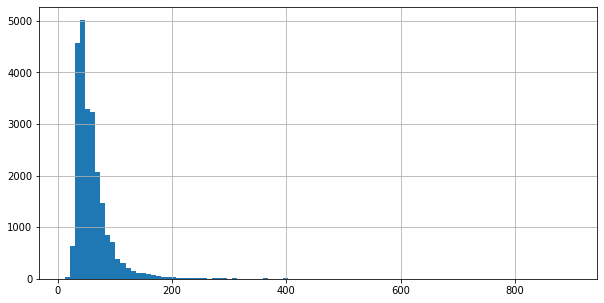

In [88]:
data_work['total_area'].hist(bins=100,figsize=(10,5))

In [89]:
data_work['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Видно что почти всё множество квартир укладывается по площади в промежуток между примерно 20 и 200 квадратными метрами. очень небольшая часть выходит до примерно 400. Остальные случаи - разовые. Ограничим гистограммму по этим величинам: от 20 до 400.

<AxesSubplot:>

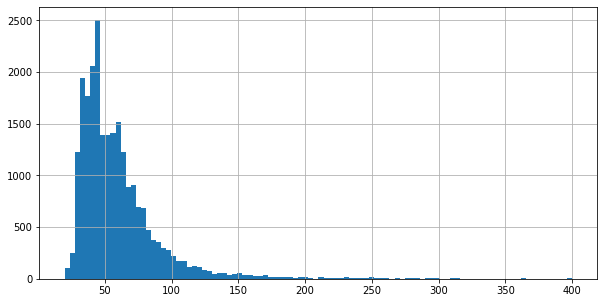

In [90]:
data_work['total_area'].hist(bins=100,figsize=(10,5),range=(20,400))

Опять же видно что всё что выше 200 кв.м. это редкие величины, сократим график ещё раз, от 20 до 200 кв. м.

<AxesSubplot:>

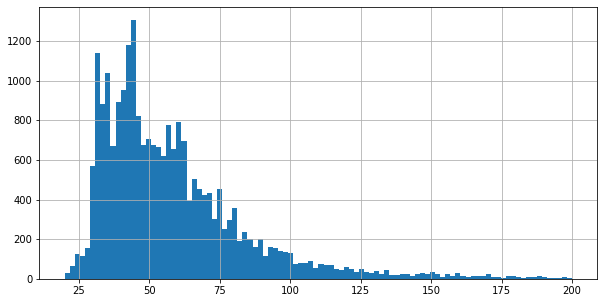

In [91]:
data_work['total_area'].hist(bins=100,figsize=(10,5),range=(20,200))

Наблюдаем вполне ожидаемую картину. Б<strong>о</strong>льшая часть квартир имеет площадь примерно между 30 и 73 кв. м. Функция .describe() примерно об этом же и говорит, выдавая значения для первого квартиля в 40 кв. м., для третьего в 69.9 кв.м.

#### Исследование параметра: <code>last_price</code> - цена на момент снятия с публикации

In [92]:
data_work['last_price'].describe()

count    2.369900e+04
mean     6.542063e+06
std      1.088699e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Построим гистограмму между минимальным и максимальным значениями

<AxesSubplot:>

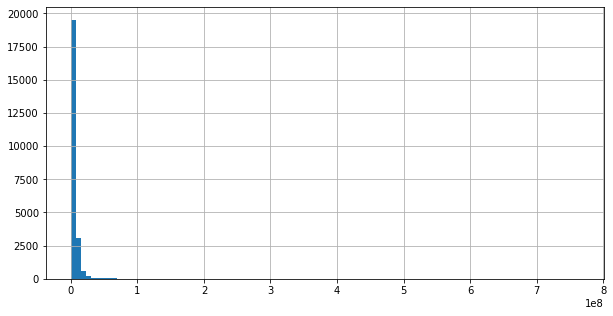

In [93]:
data_work['last_price'].hist(bins=100,figsize=(10,5))

Гистограмма требует фокусировки.

<AxesSubplot:>

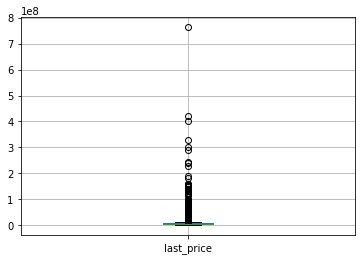

In [94]:
data_work.boxplot(column='last_price')

Значения в основном сосредоточены до 5 (а если верить функции describe(), до 6.8 млн. руб.)

<AxesSubplot:>

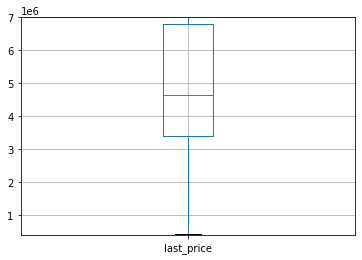

In [95]:
# Перестроим график "ящик с ушами", отрезав редкие значения с верхней и нижней части ценового диапазона
data_work['last_price']
plt.ylim(400000,7000000)
data_work.boxplot(column='last_price')

Перестроим гистограмму. Из функции describe() видно что значение цены для третьего квартиля = 6 млн. 800 тыс. При этом максимальная цена превышает эту на два порядка. Возьмём в качестве верхней границы среднее значение между максимальным и значением третьего квартиля.

<AxesSubplot:>

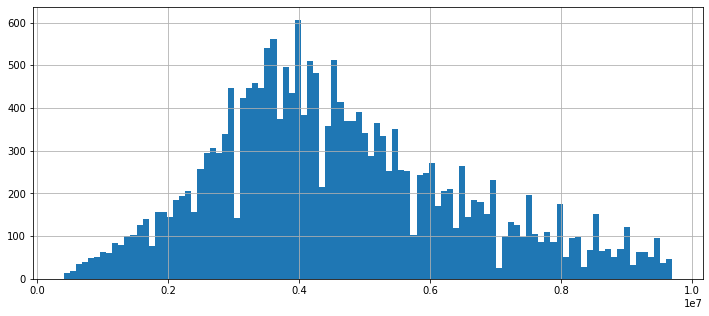

In [96]:
data_work['last_price'].hist(bins=100,figsize=(12,5),range=(400000,data_work['last_price'].quantile(0.875))) # 0.875 - медиана между Q3 и максимальным значением

In [97]:
data_work['last_price'].quantile(0.875)

9700000.0

Видим линейный рост предложения при росте цены квартир до примерно 2.5 млн руб, резкий подъем предложения до 4 млн. и далее постепенный спад предложения при увеличении цены. Больше всего квартир в ценовом диапазоне между примерно 2.5 и 5.5 млн. руб.

#### Исследование параметра: <code>rooms</code> - число комнат

In [98]:
data_work['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

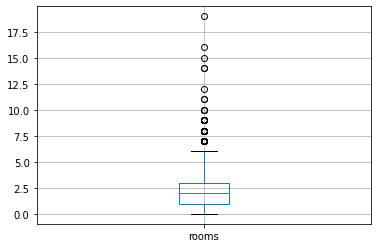

In [99]:
# Посмотрим распределение записей по числу комнат
data_work.boxplot(column='rooms')

<AxesSubplot:>

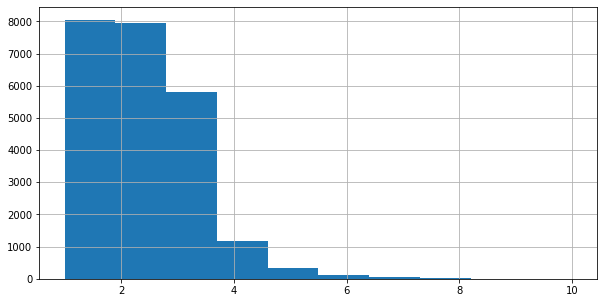

In [100]:
# Гистограмму построим в пределах от 1 до границы чуть выше третьего квартиля
data_work['rooms'].hist(bins=10,figsize=(10,5),range=(1,10))

Вывод. Подавляющее число выставлявшихся на продажу квартир имело от 1 до 4 комнат.

#### Исследование параметра: <code>ceiling_height</code> - высота потолков

<AxesSubplot:>

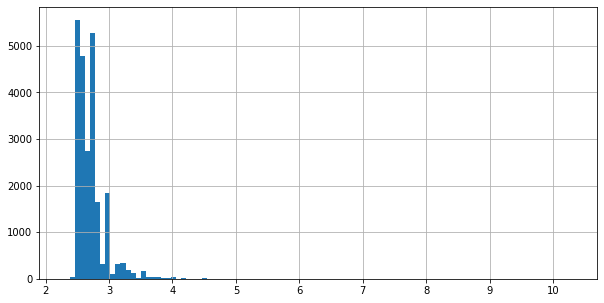

In [101]:
data_work['ceiling_height'].hist(bins=100,figsize=(10,5))

In [102]:
data_work['ceiling_height'].describe()

count    23699.000000
mean         2.703452
std          0.249709
min          2.300000
25%          2.550000
50%          2.650000
75%          2.750000
max         10.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

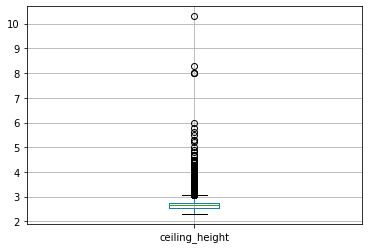

In [103]:
data_work.boxplot(column='ceiling_height')

Значения высоты потолков в основном "кружатся" вокруг 2.65 - медианного значения. И отклонения очень малочисленны. Есть некоторое число элитных квартир и пентхаусов с высотой потолков до 10.3 м. 

Посмотрим отдельно распределение для квартир в основной массе и среди элитного жилья.

<AxesSubplot:>

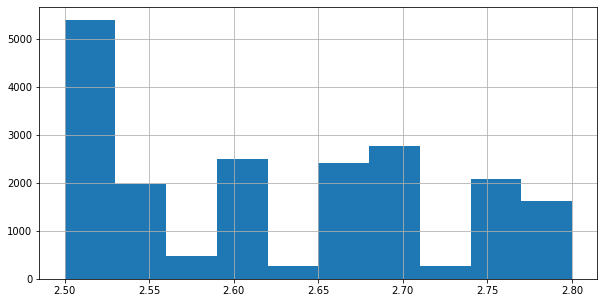

In [104]:
data_work['ceiling_height'].hist(bins=10,figsize=(10,5),range=(2.5,2.8))

<AxesSubplot:>

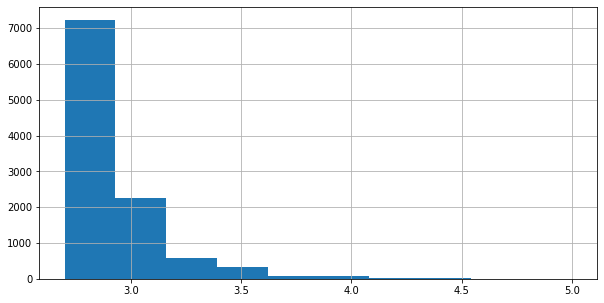

In [105]:
data_work['ceiling_height'].hist(bins=10,figsize=(10,5),range=(2.7,5))

<AxesSubplot:>

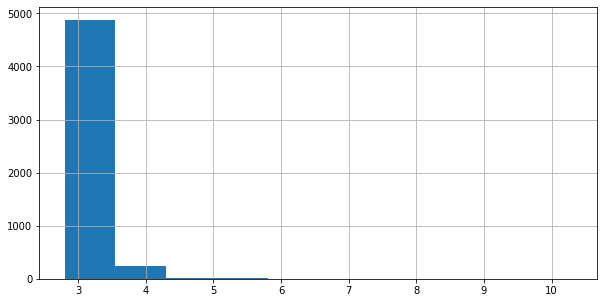

In [106]:
data_work['ceiling_height'].hist(bins=10,figsize=(10,5),range=(2.8,10.3))

Вывод. Пентхаусов крайне мало. У жилья подороже высота потолков от 2.7 метров до 3.5 метров. Также очень много квартир с высотой потолков близкой к минимально допустимой по закону - 2.5 метров

Высота потолка в 2.65 метров хотя и медианная но не потому что это самое часто встречающееся значение, а лишь потому что промежуточное

### 4.2 Изучение времени продажи квартиры

<AxesSubplot:>

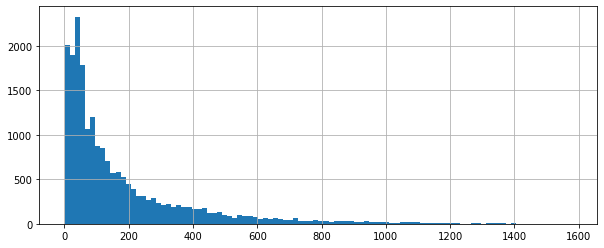

In [107]:
data_work['days_exposition'].hist(figsize=(10,4),bins=100)

Видно что большинство объявлений снимаются с публикации (предположительно по причине успешной продажи) за срок до 200-300 дней. При этом довольно большая часть объявлений закрывается за срок где-то до 100 дней, а некоторые наоборот висят годами.

In [108]:
data_work['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время размещения объявлений: 180 дней, медианное 95 дней

<AxesSubplot:>

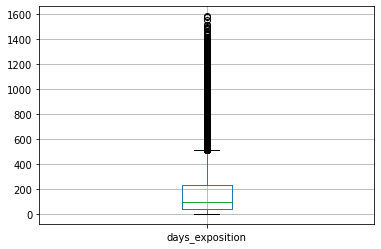

In [109]:
data_work.boxplot(column='days_exposition')

Посмотрим, у каких параметров объявления есть связь с ценой квартиры.

In [110]:
# 1) берём коэффициент Пирсона по всей таблице
# 2) из всех значений коэффициента Пирсона берем срез только по параметру дней публикации, days_exposition
# 3) транспонируем таблицу функцией T, чтобы можно было её отсортировать по росту коэффициента Пирсона
# 4) через abs() берём модуль коэффициента Пирсона
# 5) сортируем по росту значения коэффициента

abs(data_work.corr().query('abs(days_exposition) > 0.5').T).sort_values(by='days_exposition')

,days_exposition
living_area_ratio,0.012324
is_apartment,0.015262
airports_nearest,0.018271
studio,0.022476
parks_nearest,0.023254
open_plan_int,0.024112
open_plan,0.024112
total_images,0.026657
balcony,0.027834
floor,0.039463


#### 4.2.1 Наиболее быстро продаваемые квартиры

Видим что выраженной зависимости с каким-то параметром нет. Однако небольшая связь с некоторыми величинами всё же существует.

Судя по гистограмме выше есть больш<i>а</i>я часть квартир, продающихся быстрее 100 дней. Попробуем посчитать зависимости именно для этой части.

In [111]:
abs(data_work.loc[data_work['days_exposition'] < 100].corr().query('abs(days_exposition) > 0.5').T).sort_values(by='days_exposition')

,days_exposition
floor,0.002544
balcony,0.003738
square_meter_price,0.004479
living_area_ratio,0.006142
floors_total,0.008186
open_plan_int,0.008659
open_plan,0.008659
airports_nearest,0.011602
parks_around3000,0.018683
kitchen_area_ratio,0.019299


#### 4.2.2 Медленно продаваемые квартиры

Аналогично посмотрим зависимости для квартир, которые продаются долго.


In [112]:
abs(data_work.loc[data_work['days_exposition'] >= 550].corr().query('abs(days_exposition) > 0.5').T).sort_values(by='days_exposition')

,days_exposition
airports_nearest,0.001537
studio,0.005716
living_area_ratio,0.008845
floors_total,0.010092
floor,0.014944
kitchen_area_ratio,0.015120
citycenters_nearest,0.017854
parks_around3000,0.025886
balcony,0.027668
ponds_nearest,0.050680


In [113]:
data_work.loc[data_work['days_exposition'] >= 600]['open_plan'].value_counts()

False    1202
Name: open_plan, dtype: int64

#### 4.2.3 Вывод

Выраженной заметной связи между длительностью размещения объявления и какими-либо характеристиками не наблюдается. 
Исходя из медианного значения, вполне нормальным сроком продажи квартиры можно считать три месяца. Если удается продать за 1-2 месяца то это довольно быстрая продажа, больше 232 дней - медленный срок. Все объявления, размещающиеся более 550 дней соответствуют очень длительному сроку продажи.

### 4.3 Исключение редких и выбивающихся значений

<b>Общая площадь - <code>total_area</code>

Посмотрим, насколько влияют на общую картину сильно выдающиеся величины общей площади

<AxesSubplot:ylabel='Frequency'>

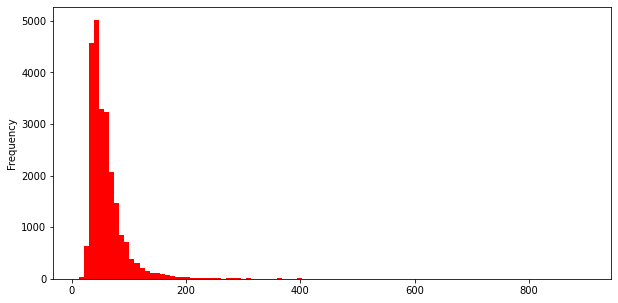

In [114]:
data_work['total_area'].plot(kind='hist',bins=100,figsize=(10,5),color='red')

<AxesSubplot:ylabel='Frequency'>

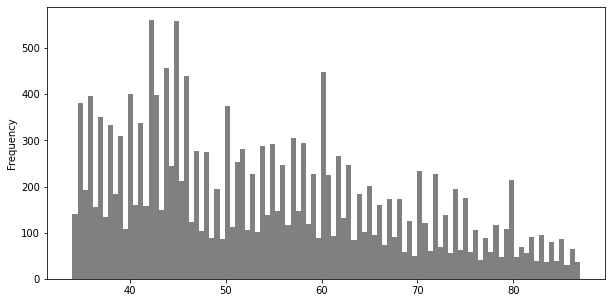

In [115]:
data_work.loc[
    (data_work['total_area'] > data_work['total_area'].quantile(0.125))
   &(data_work['total_area'] < data_work['total_area'].quantile(0.875))
]['total_area'].plot(kind='hist',bins=100,figsize=(10,5),color='gray')

Заметно что подавляющая часть квартир имеет площадь от 20 до 80 квадратных метров с пиком в районе 30. При этом у элитного жилья огромный разброс площадей, выходящий очень далеко от общей массы, иногда в десятки раз.

<b>Цена на момент продажи - <code>last_price</code>

По всем объявлениям

<AxesSubplot:ylabel='Frequency'>

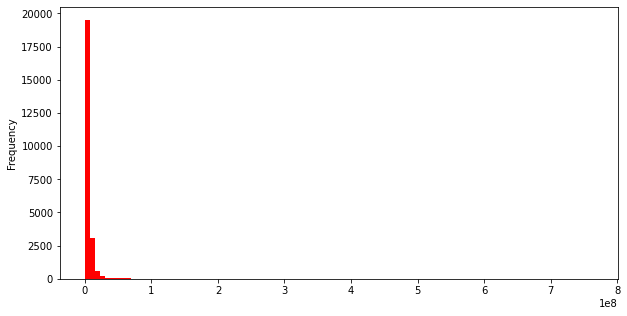

In [116]:
data_work['last_price'].plot(kind='hist',bins=100,figsize=(10,5),color='red')

По общей массе, исключая выпадающие значения

<AxesSubplot:ylabel='Frequency'>

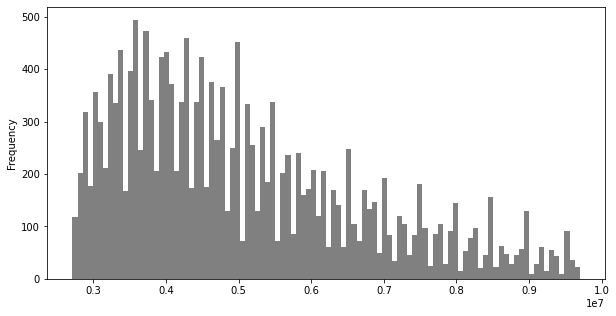

In [117]:
data_work.loc[
    (data_work['last_price'] > data_work['last_price'].quantile(0.125))
   &(data_work['last_price'] < data_work['last_price'].quantile(0.875))
]['last_price'].plot(kind='hist',bins=100,figsize=(10,5),color='gray')

Если общая масса квартир ограничивается стоимостью в 10 миллионов рублей с пиком в районе 3-5 млн., то элитное жильё тоже на порядок дороже.

<b>Число комнат - <code>rooms</code>

Все квартиры

<AxesSubplot:ylabel='Frequency'>

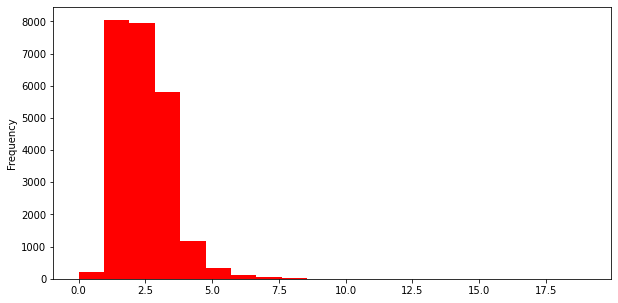

In [118]:
data_work['rooms'].plot(kind='hist',bins=20,figsize=(10,5),color='red')

Без учета квартир с обосо большим числом комнат

<AxesSubplot:ylabel='Frequency'>

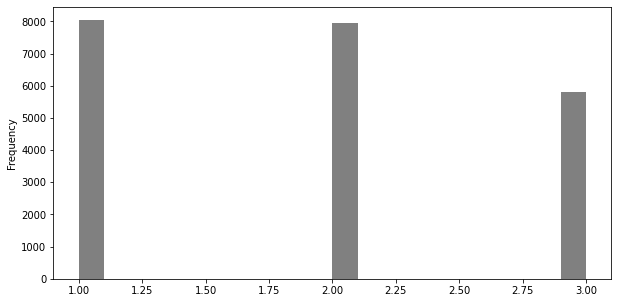

In [119]:
data_work.loc[
    (data_work['rooms'] >= data_work['rooms'].quantile(0.125))
   &(data_work['rooms'] <= data_work['rooms'].quantile(0.875))
]['rooms'].plot(kind='hist',bins=20,figsize=(10,5),color='gray')

Наличие элитных квартир сильно меняет график засчет квартир с очень большим количеством комнат. У общей массы же число комнат от 1 до 3.

<b>Высота потолков - <code>ceiling_height</code>

Высота потолков для всех квартир

<AxesSubplot:ylabel='Frequency'>

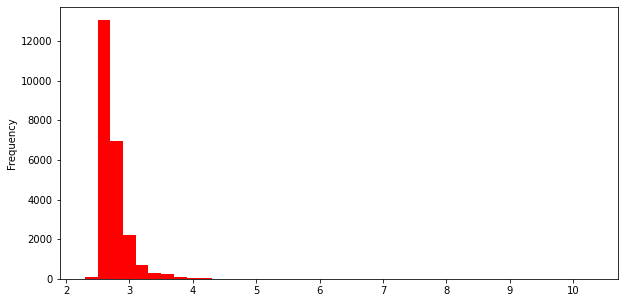

In [120]:
data_work['ceiling_height'].plot(kind='hist',bins=40,figsize=(10,5),color='red')

Без учёта квартир с особо низкими и особо высокими потолками

<AxesSubplot:ylabel='Frequency'>

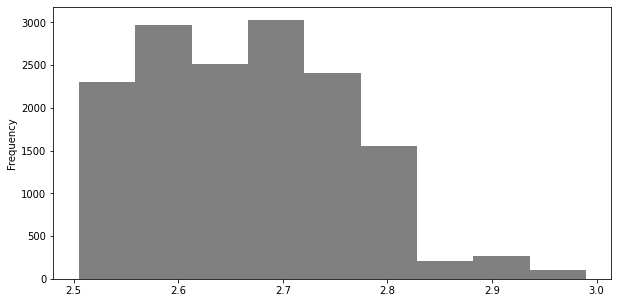

In [121]:
data_work.loc[
    (data_work['ceiling_height'] > data_work['ceiling_height'].quantile(0.125))
   &(data_work['ceiling_height'] < data_work['ceiling_height'].quantile(0.875))
]['ceiling_height'].plot(kind='hist',bins=9,figsize=(10,5),color='gray')

Итого: у основной массы квартир высота потолка от 2.5 до 3 м. Выше 2.8 м. потолки уже редки. Преимущественная высота потолка от 2.6 до 2.7 м. В элитном секторе встречаются квартиры плоть до элитных пентхаусов с двух/трехуровневой высотой. Вероятно это двухярусные квартиры с огромными окнами.

### 4.4 Изучение факторов, влияющих на стоимость

#### 4.4.1 Общая связь факторов с ценой квартиры и ценой квадратного метра

In [122]:
# Считаем модули коэффициентов Пирсона, выводим отсортированный список тех значений коэффициентов, 
# которые считаем сколько-либо показательными. Показательными будем считать значения выше 0.2

abs(data_work.corr()).sort_values(by='last_price').query('last_price >= 0.2 and last_price != 1')['last_price'] 

citycenters_nearest    0.206781
ceiling_height         0.291407
rooms                  0.363340
kitchen_area           0.520167
living_area            0.566487
total_area             0.653741
square_meter_price     0.736515
Name: last_price, dtype: float64

In [123]:
# Аналогичный подсчет делаем для стоимости квадратного метра

abs(data_work.corr()).sort_values(by='square_meter_price').query('square_meter_price >= 0.2 and square_meter_price != 1')['square_meter_price'] 

living_area            0.226356
total_area             0.302113
ceiling_height         0.307993
citycenters_nearest    0.318064
kitchen_area           0.398080
last_price             0.736515
Name: square_meter_price, dtype: float64

Логично: чем больше комнат, чем крупнее кухня, чем больше жилая площадь и площадь вообще тем выше цена, по которой продавец пытается продать квартиру.
Высота потолков, расстояние от центра города тоже сказываются.
Если же говорить про цену квадратного метра то его стоимость судя по приведенной таблице больше связана также с близостью к центру и размером кухни.


Проверим зависимости подробнее

#### 4.4.2 Связь цены и площади квартиры

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

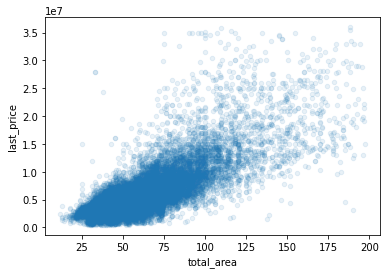

In [124]:
# Построим график зависимости цены квартиры от площади, исключив 1% самых дорогих квартир
# Также исключим из расчета самые крупные по площади квартиры (1% от общего числа)
data_work[ 
    (data_work['total_area'] < data_work['total_area'].quantile(.99))
   &(data_work['last_price'] < data_work['last_price'].quantile(.99))].plot(x='total_area',y='last_price',kind='scatter',alpha=0.1)

<AxesSubplot:xlabel='total_area', ylabel='square_meter_price'>

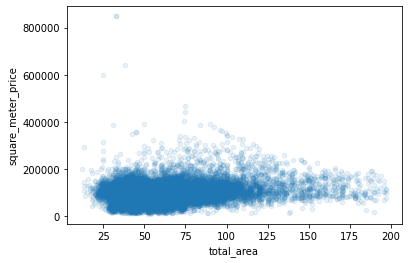

In [125]:
data_work[ 
    (data_work['total_area'] < data_work['total_area'].quantile(.99))
   &(data_work['last_price'] < data_work['last_price'].quantile(.99))].plot(x='total_area',y='square_meter_price',kind='scatter',alpha=0.1)

Видно что если жильё не относится к самому высокому сегменту то стоимость квадратного метра растет не так сильно при увеличении общей площади как стоимость квартиры, 

#### 4.4.3 Связь цены и числа комнат

<AxesSubplot:xlabel='rooms'>

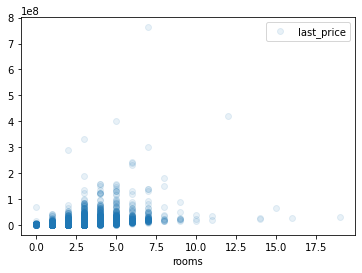

In [126]:
data_work.plot(x='rooms',y='last_price',kind='line',alpha=0.1,style='o')

Исключаем значения выше 8 комнат и со стоимостью выше 40 миллионов рублей

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

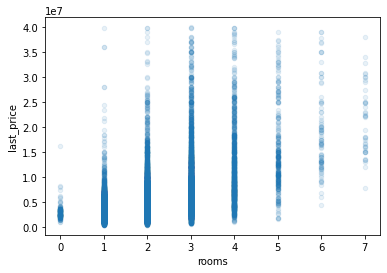

In [127]:
data_work[(data_work['rooms']<8)&(data_work['last_price'] <40000000)].plot(x='rooms',y='last_price',kind='scatter',alpha=.1,style='o')

<AxesSubplot:xlabel='rooms', ylabel='square_meter_price'>

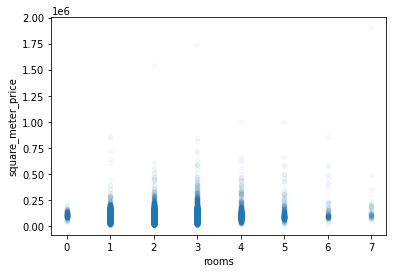

In [128]:
data_work[(data_work['rooms']<8)&(data_work['square_meter_price'] <40000000)].plot(x='rooms',y='square_meter_price',kind='scatter',alpha=.03,style='o')

<b>Вывод</b>: стоимость растет при увеличении числа комнат от 1 до 3, а далее зависимость не обнаруживатеся, вероятно в многокомнатных квартирах другие факторы оказывают более существенное влияние на цену.

#### 4.4.4 Связь цены и удаленности квартиры от центра города

<AxesSubplot:xlabel='citycenters_nearest', ylabel='last_price'>

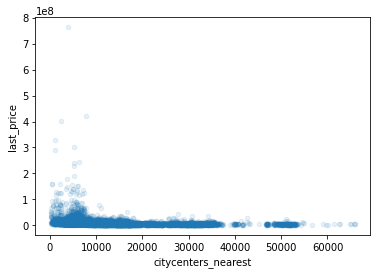

In [129]:
data_work[data_work['citycenters_nearest']>0].plot(x='citycenters_nearest',y='last_price',kind='scatter',alpha=.1,style='o')

Уберём из расчета 5% самых дорогих и 5% самых удалённых от центра квартир

<AxesSubplot:xlabel='citycenters_nearest', ylabel='last_price'>

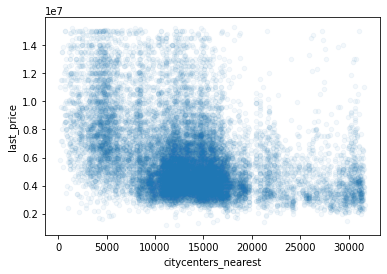

In [130]:
data_work[
    (data_work['citycenters_nearest']>0)
    &(data_work['citycenters_nearest'] < data_work['citycenters_nearest'].quantile(0.95))
    &(data_work['last_price'] < data_work['last_price'].quantile(0.95))
].plot(x='citycenters_nearest',y='last_price',kind='scatter',alpha=.05,style='o')

Стоимость снижается при удалении от центра, но до 15 км остаётся довольно много квартир с высокой ценой. Вероятно это квартиры в основном в пределах границ "КАД" Санкт-Петербурга, так как КАД находится как раз на расстоянии примерно 15 км от центра города. При этом даже в центре есть квартиры с невысокой ценой.

Проверим то же самое для цены квадратного метра. Исключаем лишь 1% самых дорогих квартир

<AxesSubplot:xlabel='citycenters_nearest', ylabel='square_meter_price'>

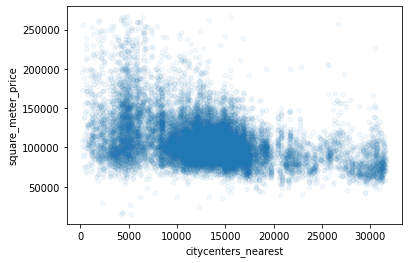

In [131]:
data_work[
    (data_work['citycenters_nearest']>0)
    &(data_work['citycenters_nearest'] < data_work['citycenters_nearest'].quantile(0.95))
    &(data_work['square_meter_price'] < data_work['square_meter_price'].quantile(0.99))
].plot(x='citycenters_nearest',y='square_meter_price',kind='scatter',alpha=.05,style='o')

Почти аналогичная ситуация

<b>Вывод</b>: бюджетные квартиры встречаются и близко к центру города (но не в самом центре), но в целом цена падает по мере удаления от центра города до границы 15 км при этом разброс довольно значительный. После 15 км цена проседает более выраженно. Вероятно до границ КАД на цену помимо дистанции от центра влияет комплекс разных  факторов. После удаления от центра за пределы границ КАД стоимость выражает более явную зависимость от расстояния до центра.

#### 4.4.5 Связь цены и этажа (первый/последний/другой)

Посмотрим распределение объявлений по цене, в зависимости от этажей

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

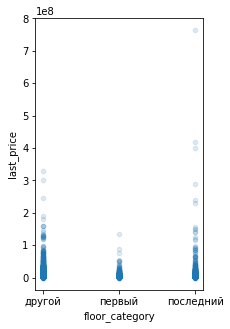

In [132]:
data_work.plot(x='floor_category',y='last_price',kind='scatter',alpha=.15,style='o',figsize=(3,5))

<b>Обычное жилье</b>

Посмотрим что будет с цифрами если исключить крайние значений (5% нижнего и 5% верхнего сегмента).

In [133]:
temp_price_table = data_work[
    (data_work['last_price'] < data_work['last_price'].quantile(0.95))
   &(data_work['last_price'] > data_work['last_price'].quantile(0.05))
].pivot_table(index=['floor_category'],values=['last_price','square_meter_price'],aggfunc={'last_price':'median','square_meter_price':'median'})


In [134]:
temp_price_table['floor_category']=temp_price_table.index
temp_price_table

,last_price,square_meter_price,floor_category
floor_category,,,
другой,4790000,97736.625514,другой
первый,4100000,83770.064481,первый
последний,4400000,89266.513057,последний


In [135]:
other = int(temp_price_table.query('floor_category=="другой"'   )['last_price'])
first = int(temp_price_table.query('floor_category=="первый"'   )['last_price']) / other
last  = int(temp_price_table.query('floor_category=="последний"')['last_price']) / other
print(f"Первый этаж по медианной цене составляет {first:.2%} от медианной цены промежуточных")
print(f"Последний этаж по медианной цене составляет {last:.2%} от медианной цены промежуточных")


Первый этаж по медианной цене составляет 85.59% от медианной цены промежуточных
Последний этаж по медианной цене составляет 91.86% от медианной цены промежуточных


<b>Элитное жильё</b>

А как обстоят дела, если взять самое дорогое жильё (верхние 5%)?

In [136]:
temp_price_table = data_work[
    (data_work['last_price'] > data_work['last_price'].quantile(0.95))   
].pivot_table(index=['floor_category'],values=['last_price','square_meter_price'],aggfunc={'last_price':'median','square_meter_price':'median'})

In [137]:
temp_price_table['floor_category']=temp_price_table.index
temp_price_table

,last_price,square_meter_price,floor_category
floor_category,,,
другой,22000000,176640.311866,другой
первый,21500500,151244.215354,первый
последний,24950000,166992.716129,последний


In [138]:
other = int(temp_price_table.query('floor_category=="другой"'   )['last_price'])
first = int(temp_price_table.query('floor_category=="первый"'   )['last_price']) / other
last  = int(temp_price_table.query('floor_category=="последний"')['last_price']) / other
print(f"Первый этаж по медианной цене составляет {first:.2%} от медианной цены промежуточных")
print(f"Последний этаж по медианной цене составляет {last:.2%} от медианной цены промежуточных")


Первый этаж по медианной цене составляет 97.73% от медианной цены промежуточных
Последний этаж по медианной цене составляет 113.41% от медианной цены промежуточных


<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

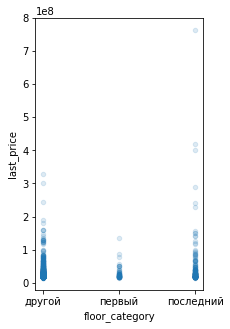

In [139]:
data_work[
    (data_work['last_price'] > data_work['last_price'].quantile(0.95))   
].plot(x='floor_category',y='last_price',kind='scatter',alpha=.15,style='o',figsize=(3,5))

<b>Вывод</b>: Для подавляющего количества объявлений квартиры на промежуточных этажах в среднем стоят дороже чем на первом и последнем, а на первом этаже чуть дешевле чем на последнем. В случае же с элитным жильём картина немного другая. Квартиры на последнем этаже дороже, промежуточные чуть дешевле, а на первом цена тоже уменьшается. <u>При этом</u> цена квартиры на последнем этаже выше, а стоимость квадратного метра у неё ниже чем на промежуточных этажах.

#### 4.4.6 Связь цены и времени размещения объявлений

Посмотрим на наличие связи между датой размещения и ценой для:

- дня недели
- месяца
- года

##### 4.4.6.1 цена - размещение по дням недели

<AxesSubplot:xlabel='exposition_day_of_week'>

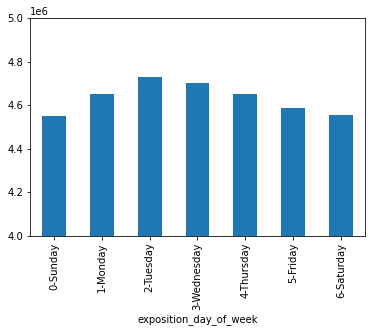

In [140]:
data_work.groupby('exposition_day_of_week')['last_price'].median().plot.bar(ylim=(4000000,5000000))

А что с ценой за квадратные метры?

<AxesSubplot:xlabel='exposition_day_of_week'>

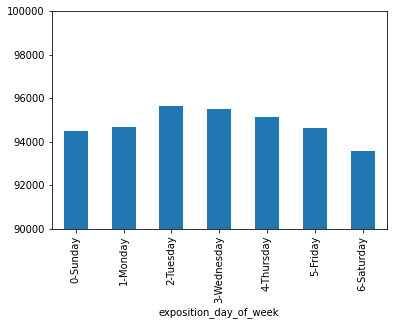

In [141]:
data_work.groupby('exposition_day_of_week')['square_meter_price'].median().plot.bar(ylim=(90000,100000))

Для цены за квадратный метр примерно та же картина

Любопытно что квартиры в объявлениях, размещенных по будням, а особенно во вторник чуть выше по стоимости чем в другие дни, особенно в выходные.

##### 4.4.6.2 цена - размещение по месяцам

<AxesSubplot:xlabel='exposition_month'>

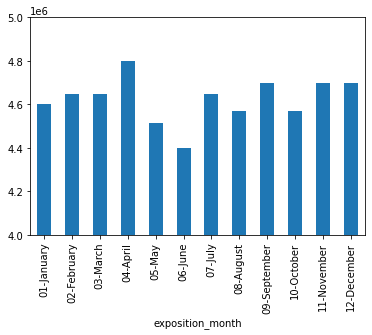

In [142]:
data_work.groupby('exposition_month')['last_price'].median().plot.bar(ylim=(4000000,5000000))

<AxesSubplot:xlabel='exposition_month'>

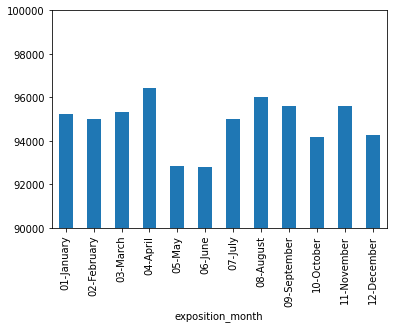

In [143]:
data_work.groupby('exposition_month')['square_meter_price'].median().plot.bar(ylim=(90000,100000))

Для месяцев наблюдаем проседание цены в мае и июне. И почему-то рост цены в апреле. Загадка но факт.

##### 4.4.6.3 цена - размещение по годам

<AxesSubplot:xlabel='exposition_year'>

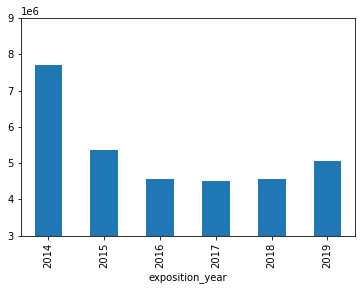

In [144]:
data_work.groupby('exposition_year')['last_price'].median().plot.bar(ylim=(3000000,9000000))

<AxesSubplot:xlabel='exposition_year'>

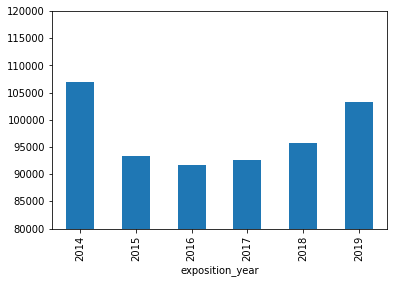

In [145]:
data_work.groupby('exposition_year')['square_meter_price'].median().plot.bar(ylim=(80000,120000))

Цены в период с 2015 по 2018 годы были ниже. С чем это связано - вопрос отдельный. Возможно что в это время на продажу больше выставлялись более дешевые квартиры. А возможно что разрастание города повлекло удорожание квартир в 2019-м году и потому пошёл рост цен. Могут быть и другие причины

### 4.5 Населённые пункты с наибольшим числом объявлений

Посмотрим основные населенные пункты, являющиеся источниками объявлений.

In [146]:
town_table = data_work.pivot_table(index=['locality_name'],values=['last_price','square_meter_price'],aggfunc={'last_price':['count','median','mean'],'square_meter_price':['median','mean']})
town_table.columns=['count','last_price_median','last_price_mean','square_meter_median','square_meter_mean']
#pd.set_option()
town_table_max = town_table.sort_values(by='count',ascending=False)[0:10]

Наибольшее число объявлений

In [147]:
town_table_max.loc[:,['count']]

,count
locality_name,
Санкт-Петербург,15721.0
посёлок Мурино,522.0
посёлок Шушары,440.0
Всеволожск,398.0
Пушкин,369.0
Колпино,338.0
посёлок Парголово,327.0
Гатчина,307.0
деревня Кудрово,299.0


Цена квадратного метра: средняя и медианная по убыванию:

In [148]:
town_table_max[['square_meter_mean','square_meter_median']].sort_values(by='square_meter_mean',ascending=False)

,square_meter_mean,square_meter_median
locality_name,,
Санкт-Петербург,104770.266315,114856.115405
Пушкин,100000.000000,103125.819291
деревня Кудрово,91860.465116,92473.547576
посёлок Парголово,91642.857143,90175.913458
посёлок Мурино,85878.462169,85752.189195
посёлок Шушары,76876.172608,78677.364217
Колпино,74723.748474,75424.579098
Гатчина,67796.610169,68746.146763
Всеволожск,65789.473684,68654.473986


Из наибольшая средняя стоимость жилья в Санкт-Петербурге:

In [149]:
town_table_max[['last_price_mean','last_price_median']].sort_values(by='last_price_mean',ascending=False).iloc[0:1]

,last_price_mean,last_price_median
locality_name,,
Санкт-Петербург,5500000.0,8.063282e+06


Меньшая цена в Выборге:

In [150]:
town_table_max[['last_price_mean','last_price_median']].sort_values(by='last_price_mean',ascending=False)[9:10]

,last_price_mean,last_price_median
locality_name,,
Выборг,2897000.0,3.250983e+06


В целом же по всем городам самая низкая цена здесь:

In [151]:
town_table.sort_values(by='last_price_mean',ascending=True).iloc[0:1]

,count,last_price_median,last_price_mean,square_meter_median,square_meter_mean
locality_name,,,,,
деревня Вахнова Кара,1.0,450000.0,450000.0,11688.311688,11688.311688


<b>Вывод:</b> Ожидаемо, чем больше населенный пункт - тем больше объявлений. В Санкт-Петербурге наибольшее число продающихся и покупающихся квартир.

### 4.6 Оценка (для Санкт-Петербурга) зависимости цены от расстояния до центра города

Продолжим исследовать вопрос зависимости цены от расстояния до центра города (начатый в пункте 4.3.4). Сфокусируемся на городе Санкт-Петербург

Выделим данные по Санкт-Петербургу в отдельную табличку

In [152]:
distance_df = data_work[data_work['locality_name']=='Санкт-Петербург'].copy()

In [153]:
# Не будем рассматривать те записи где расстояние от центра не указано
distance_df = distance_df[ distance_df['citycenters_nearest'].isna() == False ]

In [154]:
# Сделаем столбец с дистанциями в километрах без дробных частей (целочисленное значение)
distance_df['citycenters_nearest_rounded'] = (distance_df['citycenters_nearest']/1000).round(0).astype('int')


Посмотрим на среднее арифметическое значение цены в зависимости от расстояния до центра в километрах

In [155]:
distance_df.groupby('citycenters_nearest_rounded')['last_price'].mean().astype('int')

citycenters_nearest_rounded
0     31449115
1     21206720
2     17788319
3     11126581
4     13304279
5     14499121
6     15338418
7     14775152
8      9957716
9      6971194
10     6504119
11     6250814
12     5828544
13     6083140
14     5629101
15     5884751
16     5373130
17     5292394
18     5091331
19     5037674
20     5951464
21     5493469
22     5415524
23     4985376
24     3854429
25     4052839
26     3973012
27     8300000
28     5026428
29     4236666
Name: last_price, dtype: int64

Поменяем табличку дистанций, добавим средние и медианные значения для цены за квартиру и цены за квадратный метр. Выведем графики

In [156]:
distance_df = distance_df.pivot_table(index='citycenters_nearest_rounded',values=['last_price','square_meter_price'],aggfunc={'last_price':['mean','median'],'square_meter_price':['mean','median']})

In [157]:
distance_df.columns=['last_price_mean','last_price_median','square_meter_price_mean','square_meter_price_median']

In [158]:
distance_df['distance']=distance_df.index

<AxesSubplot:xlabel='Дистанция от центра', ylabel='Цена квартиры (*10^7)'>

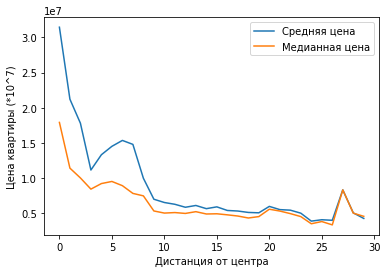

In [159]:
distance_df.plot(x='distance',y=['last_price_mean','last_price_median'],xlabel='Дистанция от центра',ylabel='Цена квартиры (*10^7)',label=['Средняя цена','Медианная цена'])

<AxesSubplot:xlabel='Дистанция от центра', ylabel='Цена квадратного метра'>

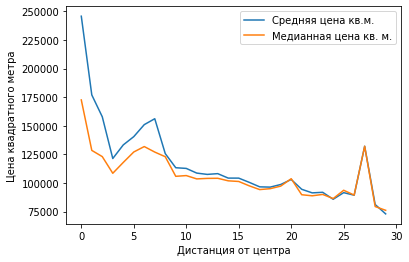

In [160]:
distance_df.plot(x='distance',y=['square_meter_price_mean','square_meter_price_median'],xlabel='Дистанция от центра',ylabel='Цена квадратного метра',label=['Средняя цена кв.м.','Медианная цена кв. м.'])

<a href="critical_error"></a>

<b>Вывод</b>. Судя по графикам, граница центра Санкт-Петербурга это примерно кольцо с радиусом в 8.5 - 9 километров с самыми высокими ценами.

### 4.7 Оценка объявлений о квартирах в центре Санкт-Петербурга

Для удобства выделим квартиры в центре и квартиры вне центра в отдельные таблички

In [161]:
data_city_center        = data_work[ (data_work['citycenters_nearest'].isna() == False) & (data_work['citycenters_nearest'] < 8800) ]
data_city_around_center = data_work[ (data_work['citycenters_nearest'].isna() == False) & (data_work['citycenters_nearest'] >= 8800) ]

Оценим сначала факторы, влияющие на стоимость квартир в центре (раздел 4.6.1) и затем сравним распределения объявлений по разным величинам (площадь, цена, число комнат и высота потолков) в центре и вне центра (раздел 4.6.2).

#### 4.7.1 Оценка факторов, влияющих на стоимость квартир в центре

##### 4.7.1.1 Числовые параметры

Посмотрим табличку коэффициентов корреляции Пирсона для стоимости квартир в центре. Будем смотреть на коэффициенты от 0.2 и выше

In [162]:
price_factors_center = abs(data_city_center.corr()[['last_price']].query('abs(last_price)>0.2')).sort_values(by='last_price').T

# Уберём из таблички временно созданные столбцы, оставив начальные характеристики
price_factors_center = price_factors_center.loc[:, ~price_factors_center.columns.isin(['square_meter_price_normalized','square_meter_price','last_price_normalized','last_price','total_area_normalized'])]
price_factors_center

,rooms,kitchen_area,living_area,total_area
last_price,0.343564,0.50539,0.544398,0.640222


Установлена видимая связь цены с общей площадью, жилой площадью, площадью кухни, числом комнат

Выделим эти характеристики в отдельный список и построим матрицу диаграм рассеяния по ним + цене, для визуальной оценки связи

In [163]:
price_factor_columns = list(price_factors_center.columns)
price_factor_columns.append('last_price')


<a id='question_2'></a>

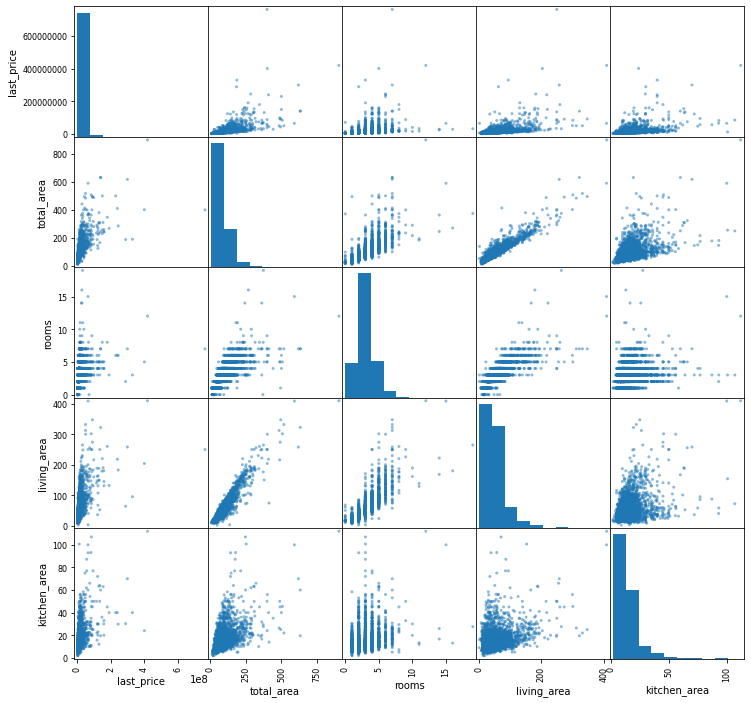

In [164]:
pd.plotting.scatter_matrix(data_city_center.loc[:, data_city_center.columns.isin(price_factor_columns) ],figsize=(12,12) )

plt.show()

Отдельно обратим внимание на зависимость цены от расстояния до непосредственной точки центра города

<AxesSubplot:xlabel='citycenters_nearest', ylabel='last_price'>

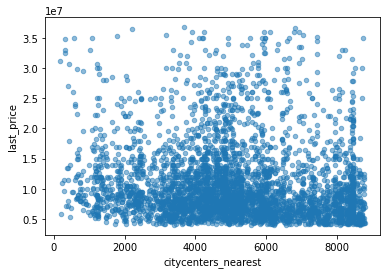

In [165]:
data_city_center[
     (data_city_center['last_price'] > data_city_center['last_price'].quantile(0.05))
    &(data_city_center['last_price'] < data_city_center['last_price'].quantile(0.95))
].plot(y='last_price',x='citycenters_nearest',kind='scatter',alpha=0.5)

Таковой зависимости не прослеживается

<a id='4.7.1.2'></a>

##### 4.7.1.2 Категориальные параметры

Посмотрим что с категориальными переменными

Категория расположения этажа (первый/другой/последний) и зависимость цены от него

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

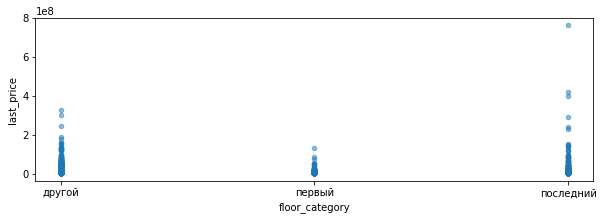

In [166]:
data_city_center.plot(kind='scatter',x='floor_category',y='last_price',figsize=(10,3),alpha=0.5)

Оценка зависимости от открытой планировки не возможна так как число таких объявлений сводится к двум

In [167]:
len(data_city_center.loc[data_city_center['open_plan'] == True])

9

Студия (да/нет). Та же ситуация

In [168]:
len(data_city_center.loc[data_city_center['studio'] == True])

18

Аппартаменты (да/нет). К сожалению тоже статистически ничтожное количество записей.

In [169]:
len(data_city_center.loc[data_city_center['is_apartment'] == True])

15

#### 4.7.2 Сравнение распределений числа объявлений в зависимости от характеристик квартиры для центра и остальных районов Санкт-Петербурга

##### 4.7.2.1 Площадь

<AxesSubplot:title={'center':'Распределение числа объявлений по площади квартиры для квартир В центре Санкт-Петербурга'}, ylabel='Frequency'>

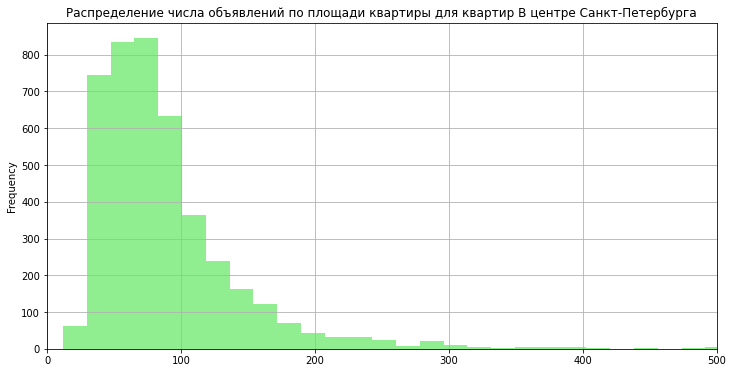

In [170]:
data_city_center['total_area'].plot(kind='hist',bins=50,figsize=(12,6),xlim=(0,500),grid=True,title='Распределение числа объявлений по площади квартиры для квартир В центре Санкт-Петербурга',color='lightgreen')

Сравним с квартирами ВНЕ центра

<AxesSubplot:title={'center':'Распределение числа объявлений по площади квартиры для квартир ВНЕ центра Санкт-Петербурга'}, ylabel='Frequency'>

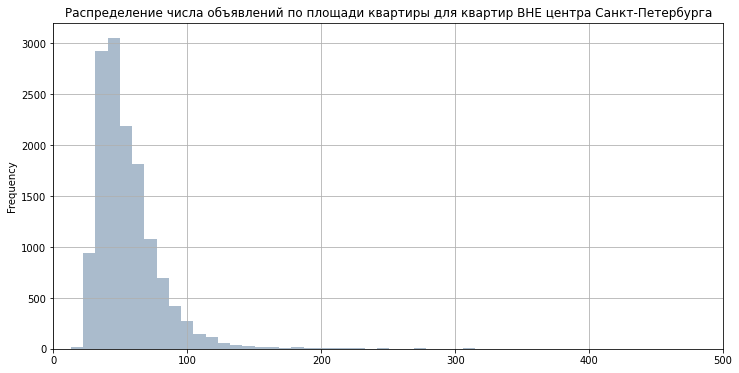

In [171]:
data_city_around_center['total_area'].plot(kind='hist',bins=50,figsize=(12,6),xlim=(0,500),grid=True,title='Распределение числа объявлений по площади квартиры для квартир ВНЕ центра Санкт-Петербурга',color='#AABBCC')

Если в остальной части города доминируют объявления о продаже квартир от 30 до 80 кв.м. то в центре разброс пошире: от 40 до 130 метров

##### 4.7.2.2 Цена

Распределение по центам в центре

<AxesSubplot:title={'center':'Распределение стоимости квартир по числу объявлений в центре Санкт-Петербурга'}, ylabel='Frequency'>

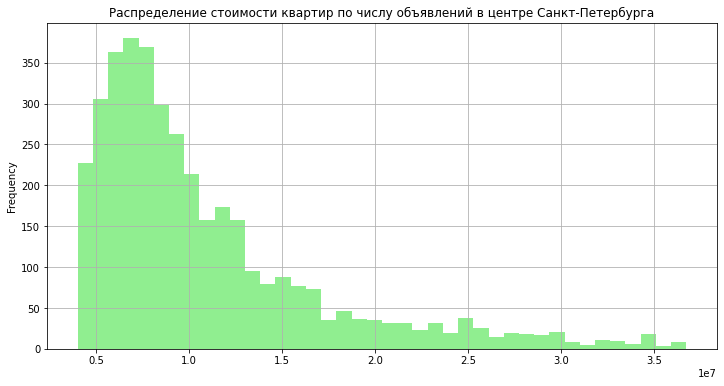

In [172]:
# Не берем 5% самых дорогих и самых дешевых квартир, так как они сильно сжимают основную часть значений
data_city_center[
    (data_city_center['last_price'] > data_city_center['last_price'].quantile(0.05))
   &(data_city_center['last_price'] < data_city_center['last_price'].quantile(0.95))
]['last_price'].plot(kind='hist',bins=40,figsize=(12,6),grid=True,title='Распределение стоимости квартир по числу объявлений в центре Санкт-Петербурга',color='lightgreen')

Посмотрим также распределение квартир <b>вне центра</b> по центам

<AxesSubplot:title={'center':'Распределение стоимости квартир по числу объявлений вне центра Санкт-Петербурга'}, ylabel='Frequency'>

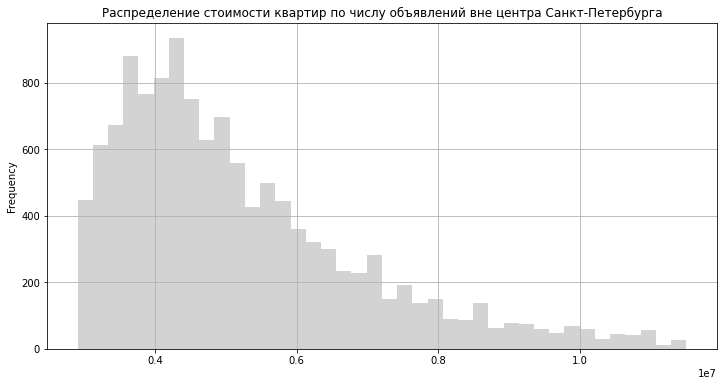

In [173]:
# Не берем 5% самых дорогих и самых дешевых квартир, так как они сильно сжимают основную часть значений
data_city_around_center.loc[ 
    (data_city_around_center['last_price'] > data_city_around_center['last_price'].quantile(0.05))
   &(data_city_around_center['last_price'] < data_city_around_center['last_price'].quantile(0.95))
]['last_price'].plot(kind='hist',bins=40,figsize=(12,6),grid=True,title='Распределение стоимости квартир по числу объявлений вне центра Санкт-Петербурга',color='lightgray')

И тоже для цены <b>квадратного метра</b> в центре

<AxesSubplot:title={'center':'Распределение стоимости кв.метра по числу объявлений в центре Санкт-Петербурга'}, ylabel='Frequency'>

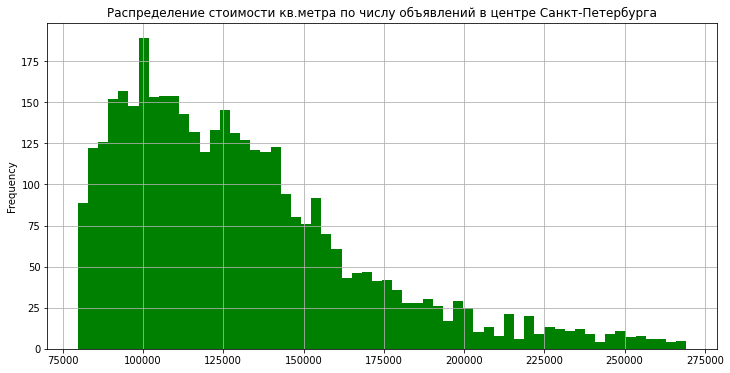

In [174]:
# Не берем 5% самых дорогих и самых дешевых квартир, так как они сильно сжимают основную часть значений
data_city_center[
    (data_city_center['square_meter_price'] > data_city_center['square_meter_price'].quantile(0.05))
   &(data_city_center['square_meter_price'] < data_city_center['square_meter_price'].quantile(0.95))
]['square_meter_price'].plot(kind='hist',bins=60,figsize=(12,6),grid=True,title='Распределение стоимости кв.метра по числу объявлений в центре Санкт-Петербурга',color='green')

И цены <b>квадратного метра</b> <u>вне</u> центра

<AxesSubplot:title={'center':'Распределение стоимости кв.метра по числу объявлений вне центра Санкт-Петербурга'}, ylabel='Frequency'>

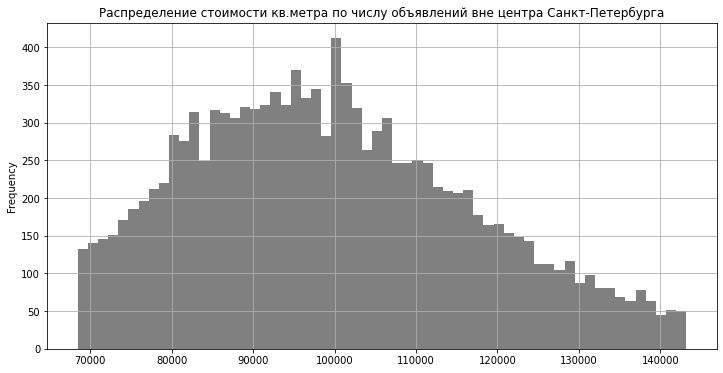

In [175]:
# Не берем 5% самых дорогих и самых дешевых квартир, так как они сильно сжимают основную часть значений
data_city_around_center.loc[ 
    (data_city_around_center['square_meter_price'] > data_city_around_center['square_meter_price'].quantile(0.05))
   &(data_city_around_center['square_meter_price'] < data_city_around_center['square_meter_price'].quantile(0.95))
]['square_meter_price'].plot(kind='hist',bins=60,figsize=(12,6),grid=True,title='Распределение стоимости кв.метра по числу объявлений вне центра Санкт-Петербурга',color='gray')

И для квартир в центре и для квартир вне центра картина очень похожая. Но так как в центре больше дорогих квартир то и гистограмма смещена влево.

##### 4.7.2.3 Количество комнат

<AxesSubplot:title={'center':'Распределение объявлений по числу комнат в центре Санкт-Петербурга'}, ylabel='Frequency'>

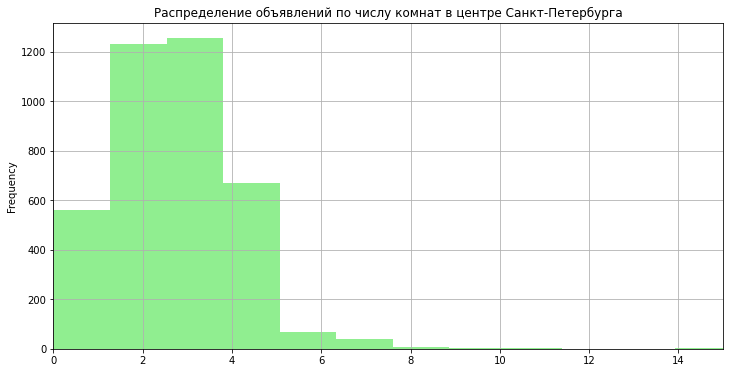

In [176]:
# Не берем 5% самых дорогих и самых дешевых квартир, так как они сильно сжимают основную часть значений
data_city_center[
    (data_city_center['last_price'] > data_city_center['last_price'].quantile(0.05))
   &(data_city_center['last_price'] < data_city_center['last_price'].quantile(0.95))
]['rooms'].plot(kind='hist',bins=15,figsize=(12,6),grid=True,title='Распределение объявлений по числу комнат в центре Санкт-Петербурга',color='lightgreen',xlim=(0,15))

<AxesSubplot:title={'center':'Распределение объявлений по числу комнат ВНЕ центра Санкт-Петербурга'}, ylabel='Frequency'>

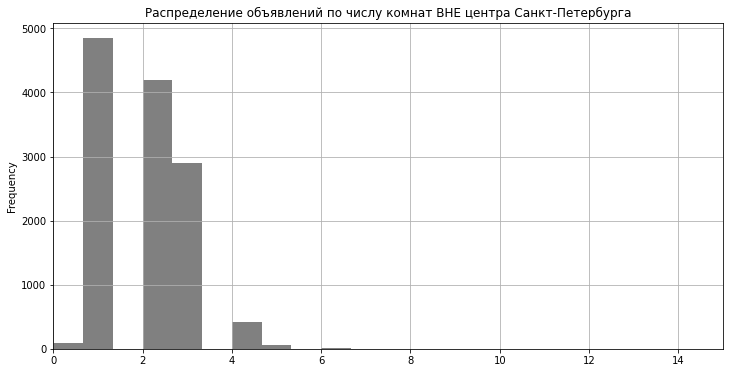

In [177]:
# Не берем 5% самых дорогих и самых дешевых квартир, так как они сильно сжимают основную часть значений
data_city_around_center.loc[ 
    (data_city_around_center['square_meter_price'] > data_city_around_center['square_meter_price'].quantile(0.05))
   &(data_city_around_center['square_meter_price'] < data_city_around_center['square_meter_price'].quantile(0.95))
]['rooms'].plot(kind='hist',bins=15,figsize=(12,6),grid=True,title='Распределение объявлений по числу комнат ВНЕ центра Санкт-Петербурга',color='gray',xlim=(0,15))

##### 4.7.2.4 Высота потолков

Распределение объявлений о продаже квартир в центре Санкт-Петербурга по высоте потолков

<AxesSubplot:title={'center':'Распределение объявлений в центре Санкт-Петербурга по высоте потолков'}, ylabel='Frequency'>

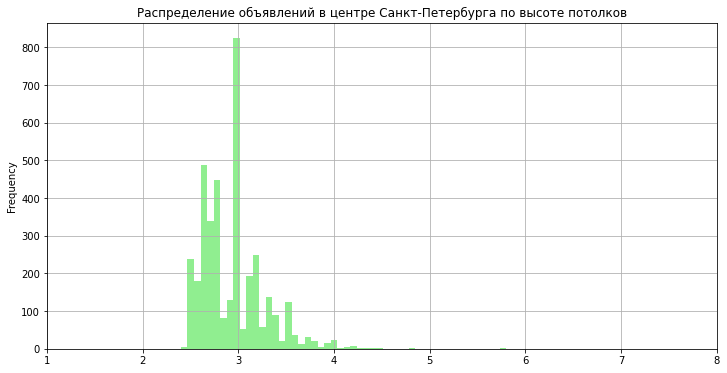

In [178]:
# Не берем 5% самых дорогих и самых дешевых квартир, так как они сильно сжимают основную часть значений
data_city_center[
    (data_city_center['last_price'] > data_city_center['last_price'].quantile(0.05))
   &(data_city_center['last_price'] < data_city_center['last_price'].quantile(0.95))
]['ceiling_height'].plot(kind='hist',bins=50,figsize=(12,6),grid=True,title='Распределение объявлений в центре Санкт-Петербурга по высоте потолков',color='lightgreen',xlim=(1,8))

<AxesSubplot:title={'center':'Распределение объявлений вне центра Санкт-Петербурга по высоте потолков'}, ylabel='Frequency'>

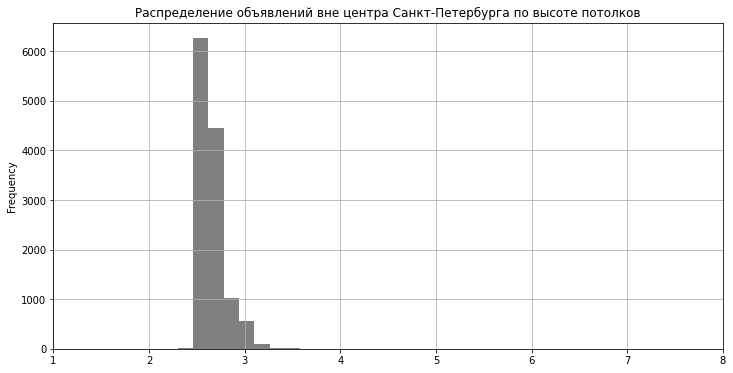

In [179]:
# Не берем 5% самых дорогих и самых дешевых квартир, так как они сильно сжимают основную часть значений
data_city_around_center[
    (data_city_around_center['last_price'] > data_city_around_center['last_price'].quantile(0.05))
   &(data_city_around_center['last_price'] < data_city_around_center['last_price'].quantile(0.95))
]['ceiling_height'].plot(kind='hist',bins=50,figsize=(12,6),grid=True,title='Распределение объявлений вне центра Санкт-Петербурга по высоте потолков',color='gray',xlim=(1,8))

Если вне центра у большинства квартир выта ближе к 2.5-2.65 м, то в центре в пик на уровне 3 м, а у большого числа квартир и ощутимо выше.

Сравним влияющие на цену факторы для центра и вне центра

Вне центра

In [180]:
price_factors_around_center = abs(data_city_around_center.corr()[['last_price']].query('abs(last_price)>0.2')).sort_values(by='last_price').T

# Уберём из таблички временно созданные столбцы, оставив начальные характеристики
price_factors_around_center = price_factors_around_center.loc[:, ~price_factors_around_center.columns.isin(['square_meter_price_normalized','square_meter_price','last_price_normalized','last_price','total_area_normalized'])]
price_factors_around_center

,ceiling_height,rooms,kitchen_area,living_area,total_area
last_price,0.313687,0.518716,0.639764,0.697155,0.81841


В центре

In [181]:
price_factors_center

,rooms,kitchen_area,living_area,total_area
last_price,0.343564,0.50539,0.544398,0.640222


#### 4.7.3 Вывод по Санкт-Петербургу

На цену в городе Санкт-Петербург наибольшее влияние оказывают в порядке убывания: 
- Общая площадь квартиры
- Жилая площадь квартиры
- Размер кухни
- Число комнат

Кроме того график из раздела [4.7.1.2](#4.7.1.2), показывает что первый этаж пользуется меньшей популярностью чем промежуточные, а самые дорогие квартиры можно найти на последних этажах.<BR>Высота потолков для центра меньше сказывается в цене чем для других районов.

### 5 Общий вывод

Насмотря на большое число объявлений, существует ряд факторов которые требуют намного большей статистики для оценки их влияния на стоимость квартир. В частности такие такие параметры как наличие/отсутствие открытой планировки, является ли квартира студией либо аппартаментами.
По тем данным что имеются наиболее существенное влияние на цену квартиры оказывает:
- факт нахождения квартиры в пределах центра Санкт-Петербурга
- общая площадь квартиры, жилая площадь и площадь кухни, которыея в свою очередь зависят от общей площади)
- число комнат
- этаж на котором расположена квартира

При этом в случае с этажом - квартиры на первом этаже дешевле. Последний этаж обладает большей стоимостью в элитном/бизнес сегменте. Для общей же массы квартиры на промежуточных этажах чуть дороже первого и последнего этажей.

К сожалению сложно оценить влияние таких факторов как расстояния до водоёмов, парков и их число в связи с тем что у огромного числа объявлений эти данные не заполнены, а в тех объявлениях о продаже где данные указаны - данные характеристики квартир не проявили какого-либо заметного влияния на стоимость.